Bibliotekų importavimas. Iš plots.py failo importuojamos klasės, kurios bus naudojamos modeliuojant duomenis.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from plots import BarPlot, LinePlot, Heatmap, GroupedBarPlot, Catplot, ScatterPlot


Duomenų užkrovimas ir sujungimas


In [3]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
main = pd.merge(athletes, regions, on='NOC', how='left')
main = main.reset_index(drop=True)
main.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Šiek tiek aptvarkykime duomenis: 
- Nustatykime, kad index stulpeliu būtų ID stulpelis

In [7]:
main.set_index('ID', inplace=True)

- Pasižiūrėkime ar datasete yra tuščių (null) duomenų. 
Tuščius duomenis pašalinsime vėliau, kadangi darant tai per anksti prarasime duomenis, kurių reikės

In [8]:
main.isnull().sum()


Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

- Pasižiūrėkime bendrą statistinę informaciją

In [9]:
main.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


- Ir kokie duomenų tipai sudaro datasetą

In [10]:
datatypes = main.dtypes
datatypes

Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

1 dalis. Sportinių rungčių statistika

In [11]:
number_of_games = main['Year'].nunique()
number_of_games
number_of_games_summer = main[(main['Season'] == 'Summer')]
number_of_games_summer = number_of_games_summer['Year'].unique()
number_of_games_summer

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [12]:
medals = main[main['Medal'].notna()]
medal_counts = medals.groupby('region')['Medal'].count().reset_index()
medal_counts = medal_counts.sort_values(by='Medal', ascending=False)
medal_counts.columns=['Country', 'MedalCount']
medal_counts.reset_index(drop=True, inplace=True)
medal_counts.index += 1
medal_counts.head(10)

,Country,MedalCount
1,USA,5637
2,Russia,3947
3,Germany,3756
4,UK,2068
5,France,1777
6,Italy,1637
7,Sweden,1536
8,Canada,1352
9,Australia,1349
10,Hungary,1135


Pradėkime pasižiūrėdami kokios sporto šakos dominavo per visą Olimpinių žaidinių istoriją. Tam, suformuokime subsetą 'disciplines', susumuokime kiekvieną sporto šaką ir nusibrėžkime stulpelinę diagramą. 

In [99]:
disciplines = main['Sport'].value_counts().reset_index()
disciplines.columns = ['Discipline', 'Athletes']
disciplines.index += 1
disciplines

,Discipline,Athletes
1,Athletics,38624
2,Gymnastics,26707
3,Swimming,23195
4,Shooting,11448
5,Cycling,10859
...,...,...
62,Racquets,12
63,Jeu De Paume,11
64,Roque,4
65,Basque Pelota,2


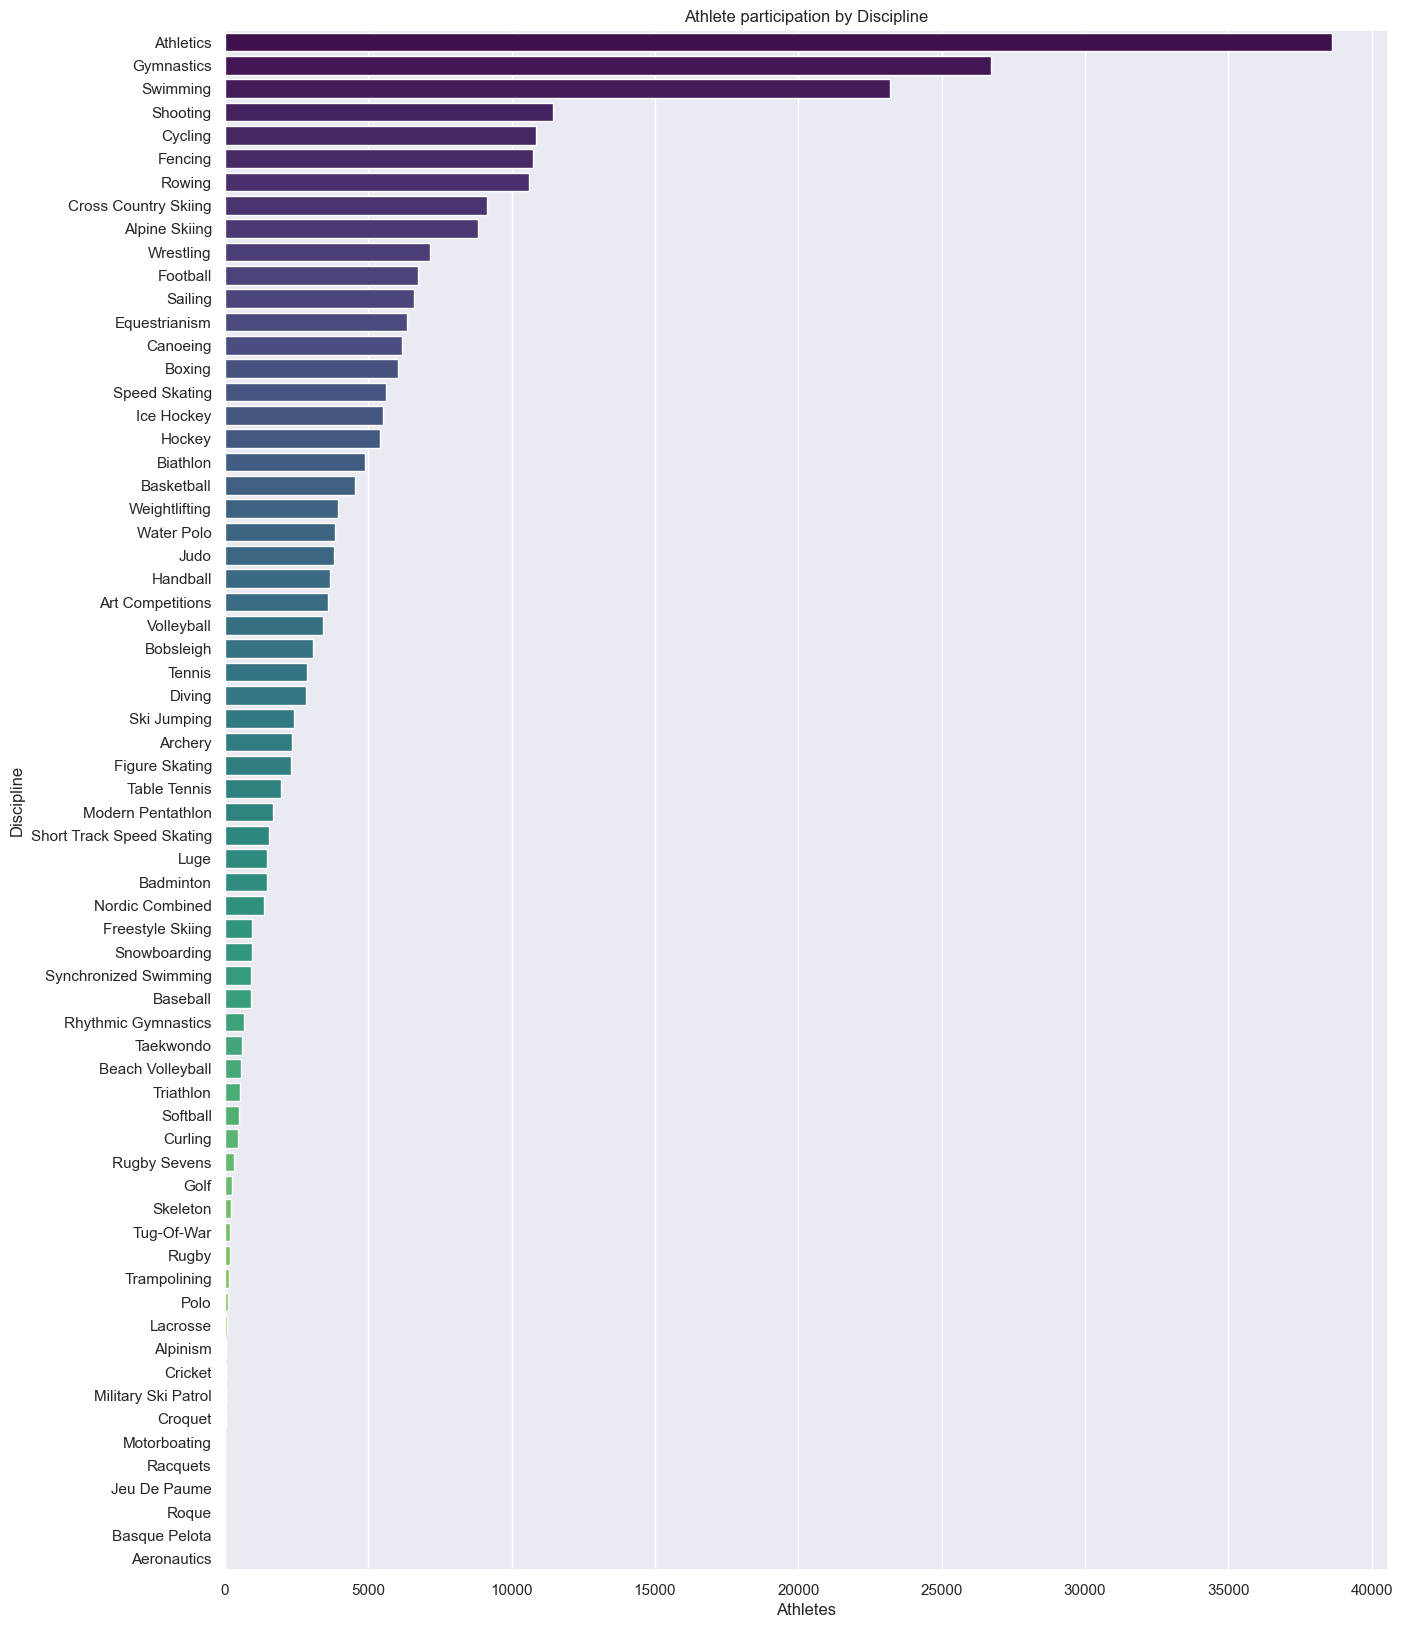

In [14]:
bar_plot_main = BarPlot(x='Athletes', y='Discipline', data=disciplines)
bar_plot = bar_plot_main.create_bar_plot(palette='viridis', title='Athlete participation by Discipline')

Žvelkime giliau ir suskaidykime pagrindinį datasetą, kad būtų galima išskirti vasaros ir žiemos sporto šakas

In [15]:
summer_df = main[(main['Season'] == 'Summer')]
winter_df = main[(main['Season'] == 'Winter')]


Toliau dirbame su gautais datasetais. Pradėkime nuo vasaros (summer_df). Sugrupuokime sporto šakas ir suskaičiuokime, kiek kiekviena sporto disciplina pritraukė dalyvių per visą istoriją

In [103]:
disciplines_summer = summer_df.groupby('Sport')['Season'].count().reset_index()
disciplines_summer = disciplines_summer.sort_values(by='Season', ascending=False).reset_index(drop=True)
disciplines_summer.columns=['Discipline', 'Occurences']
disciplines_summer.index +=1
disciplines_summer.head()


,Discipline,Occurences
1,Athletics,38624
2,Gymnastics,26707
3,Swimming,23195
4,Shooting,11448
5,Cycling,10859


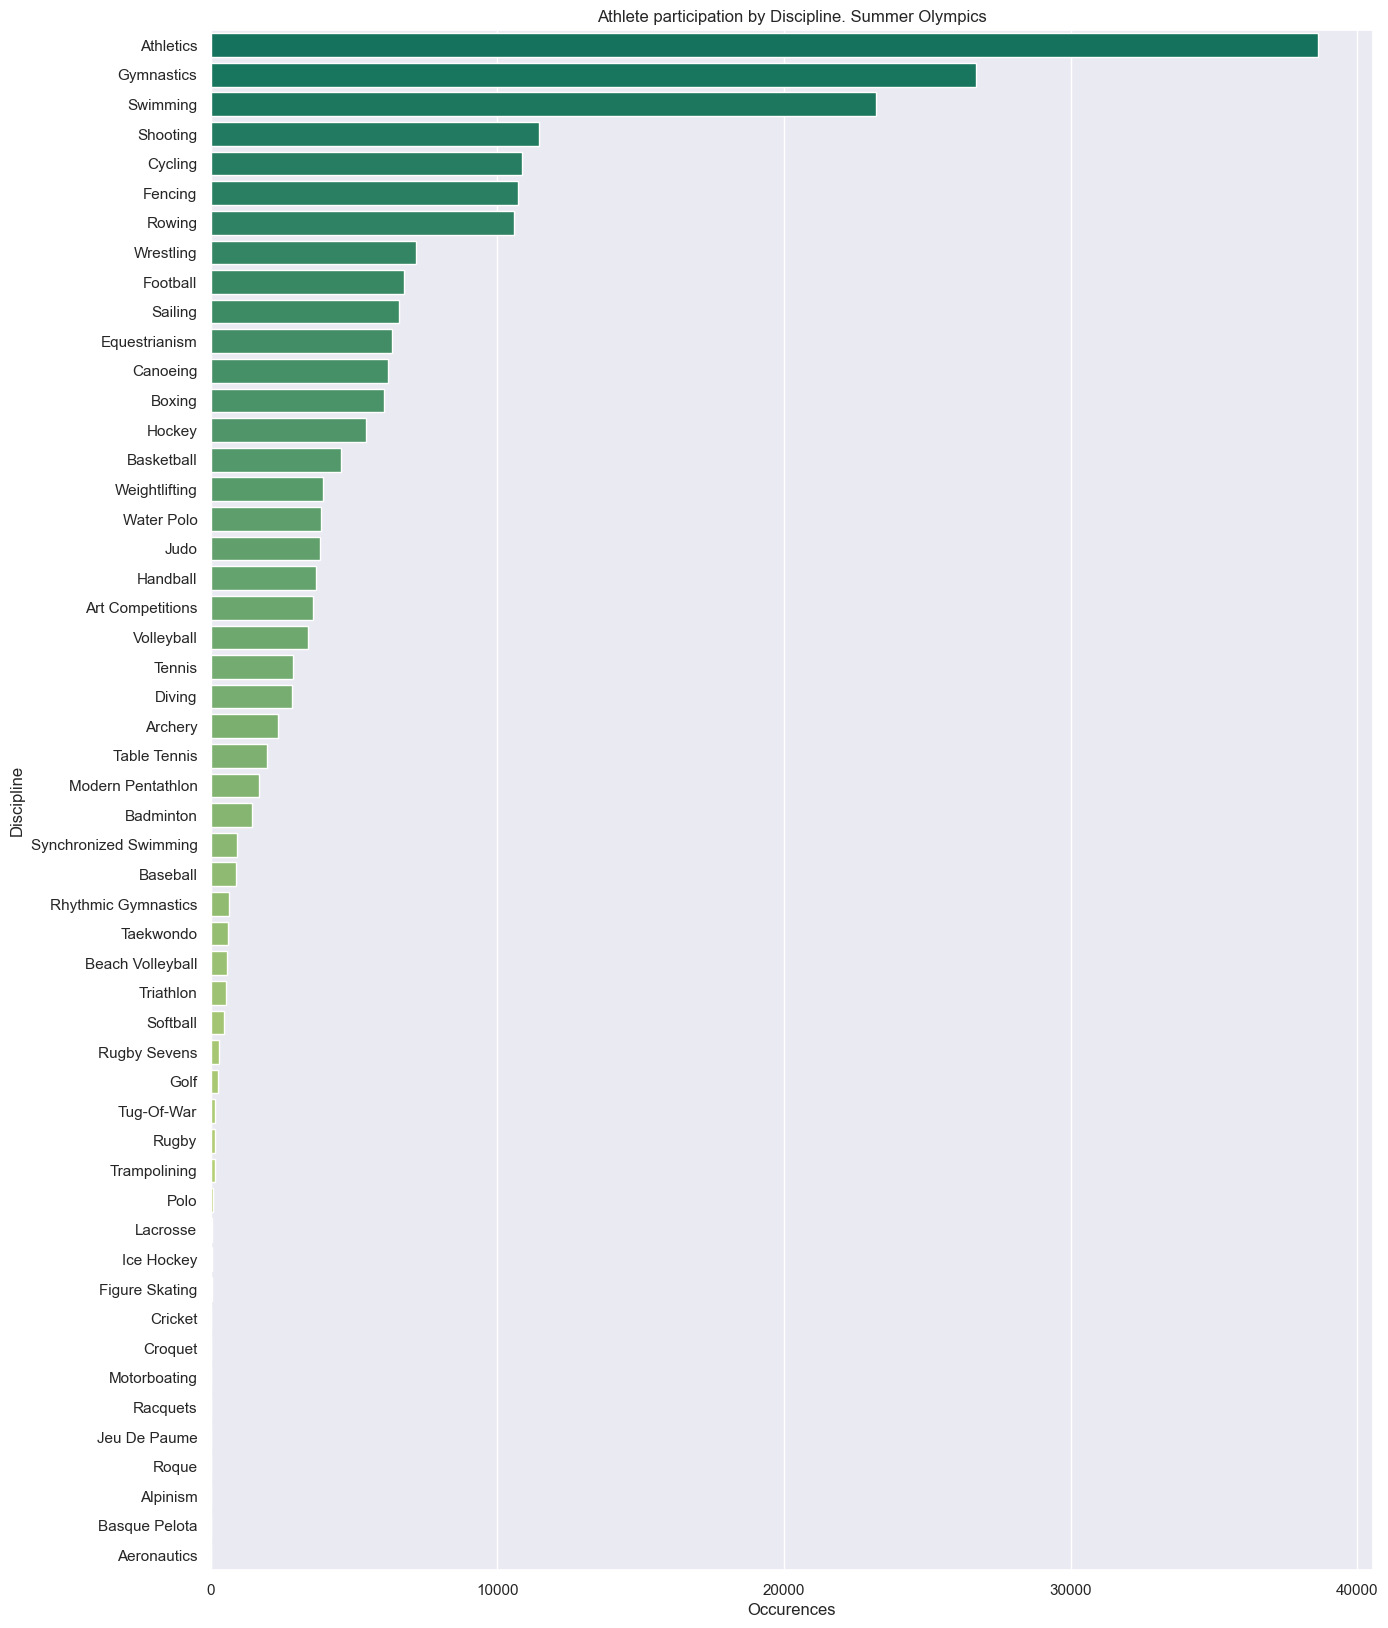

In [104]:
bar_plot_summer = BarPlot(x='Occurences', y='Discipline', data=disciplines_summer)
bar_graph_summer = bar_plot_summer.create_bar_plot(palette='summer', title='Athlete participation by Discipline. Summer Olympics')
bar_plot_summer.configure_xticks(min=0, max=40000, step=10000)

Pasižiūrėkime kurios sporto šakos nebuvo tokios populiarios ir turėjo mažiausiai dalyvių. Tam:
- Sugrupuojamas datasetas pagal sporto šakas ir suskaičiuojami dalyviai kiekvienoje sporto šakoje,
- Išfiltruokime sporto šakas, kurios turėjo mažiau nei 10 dalyvių,
- Kadangi filtruoti duomenys yra atskirame datasete, filtruotus duomenis surasime pagrindiniame summer_df datasete su isin metodu

In [101]:
lowest_participation_summer_grouped = summer_df.groupby('Sport')['Name'].nunique().reset_index()

lowest_participation_summer_filtered = lowest_participation_summer_grouped[lowest_participation_summer_grouped['Name'] < 10]
lowest_participation_summer_filtered

lowest_participation_summer_final = summer_df[summer_df['Sport'].isin(lowest_participation_summer_filtered['Sport'])].sort_values('Year', ascending=True)
lowest_participation_summer_final = lowest_participation_summer_final.drop_duplicates(subset='Name')

Turėdami duomenis, sukurkime heatmap grafiką, kuris labai įdomiu būdu parodo tas sporto šakas, kurios turi < 10 dalyvių. Langeliuose matome dalyvių skaičių

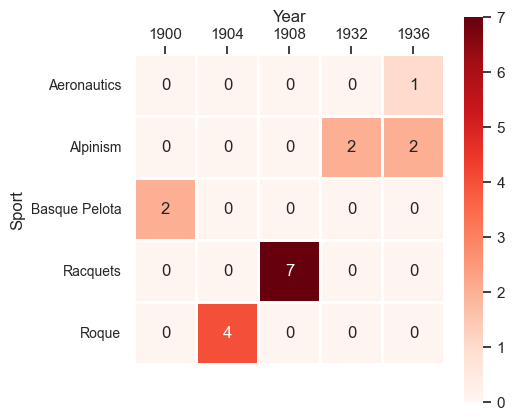

In [18]:
pivot_table = lowest_participation_summer_final.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)
heatmap_creator = Heatmap(data=pivot_table, index='Sport', columns='Year', cmap='Reds')
heatmap_creator.create_heatmap()
heatmap_creator.configure_labels(10,10, 'top')

Tuos pačius veiksmus pakartokime ir su žiemos datasetu. Gausime analogiškus rezultatus, tik apie žiemos sporto rungtis

In [111]:
disciplines_winter = winter_df.groupby('Sport')['Season'].count().reset_index()
disciplines_winter = disciplines_winter.sort_values(by='Season', ascending=False).reset_index(drop=True)
disciplines_winter.columns=['Discipline', 'Occurences']
disciplines_winter.index +=1
disciplines_winter.tail()

,Discipline,Occurences
13,Snowboarding,936
14,Curling,463
15,Skeleton,199
16,Military Ski Patrol,24
17,Alpinism,21


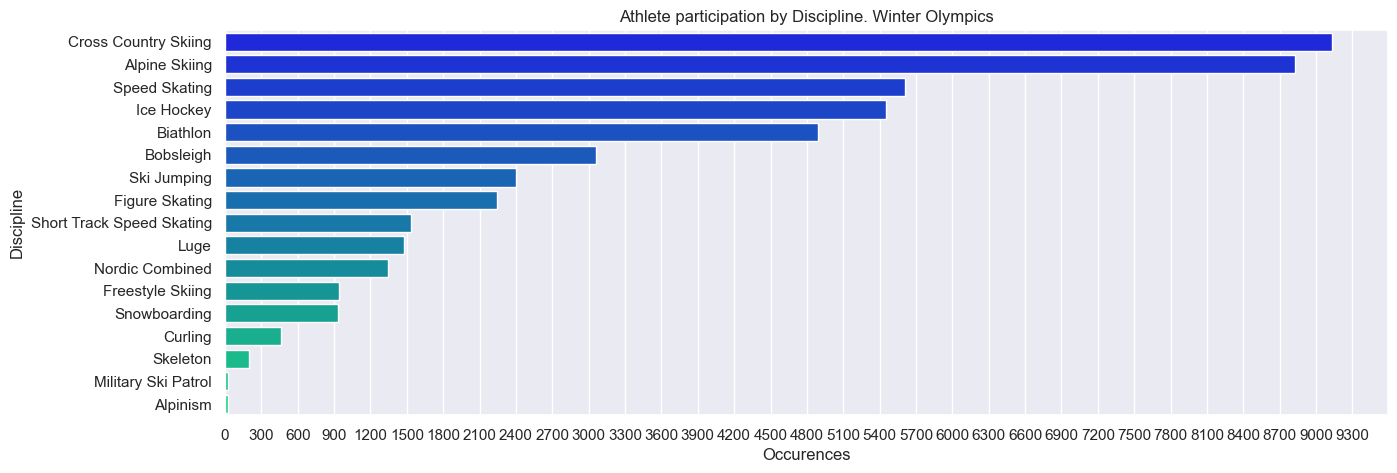

In [127]:
bar_plot_winter = BarPlot(x='Occurences', y='Discipline', data=disciplines_winter)
bar_graph_winter = bar_plot_winter.create_bar_plot(palette='winter', figsize=(15,5), title='Athlete participation by Discipline. Winter Olympics')

bar_plot_main.configure_xticks(min=0, max=9300, step=300)

Žiemos žaidynės turi ir mažiau sporto šakų ir mažiau dalyvių, todėl atfiltruokime TOP3 nepopuliariausias sporto šakas. T.y. tas, kurios turi < 300 dalyvių.

In [125]:
lowest_participation_winter_grouped = winter_df.groupby('Sport')['Name'].nunique().reset_index()

lowest_participation_winter_filtered = lowest_participation_winter_grouped[lowest_participation_winter_grouped['Name'] < 300]
lowest_participation_winter_filtered

lowest_participation_winter_final = winter_df[winter_df['Sport'].isin(lowest_participation_winter_filtered['Sport'])].sort_values('Year', ascending=True)
lowest_participation_winter_final = lowest_participation_winter_final.drop_duplicates(subset='Name')

Gauname įdomų rezultatą. Dvi sporto šakos vyko tik vienais metais, todėl, natūraliai jos tarp nepopuliariausių. Tačiau taip pat matosi, kad Skeletonas yra ganėtinai mažai dalyvių pritraukianti sporto šaka ir modernesniais laikais

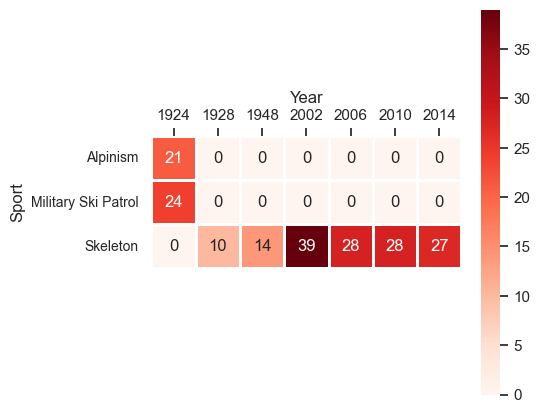

In [126]:
pivot_table = lowest_participation_winter_final.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)
heatmap_creator = Heatmap(data=pivot_table, index='Sport', columns='Year', cmap='Reds')
heatmap_creator.create_heatmap()
heatmap_creator.configure_labels(10,10, 'top')

Sudarykime heatmapą, kuris parodytų kiek tam tikrais metais buvo viso dalyvių atskirose rungtyse. Kur atvaizduojamas 0 - tais metais tos rungties Olimpinėse apskritai nebuvo.

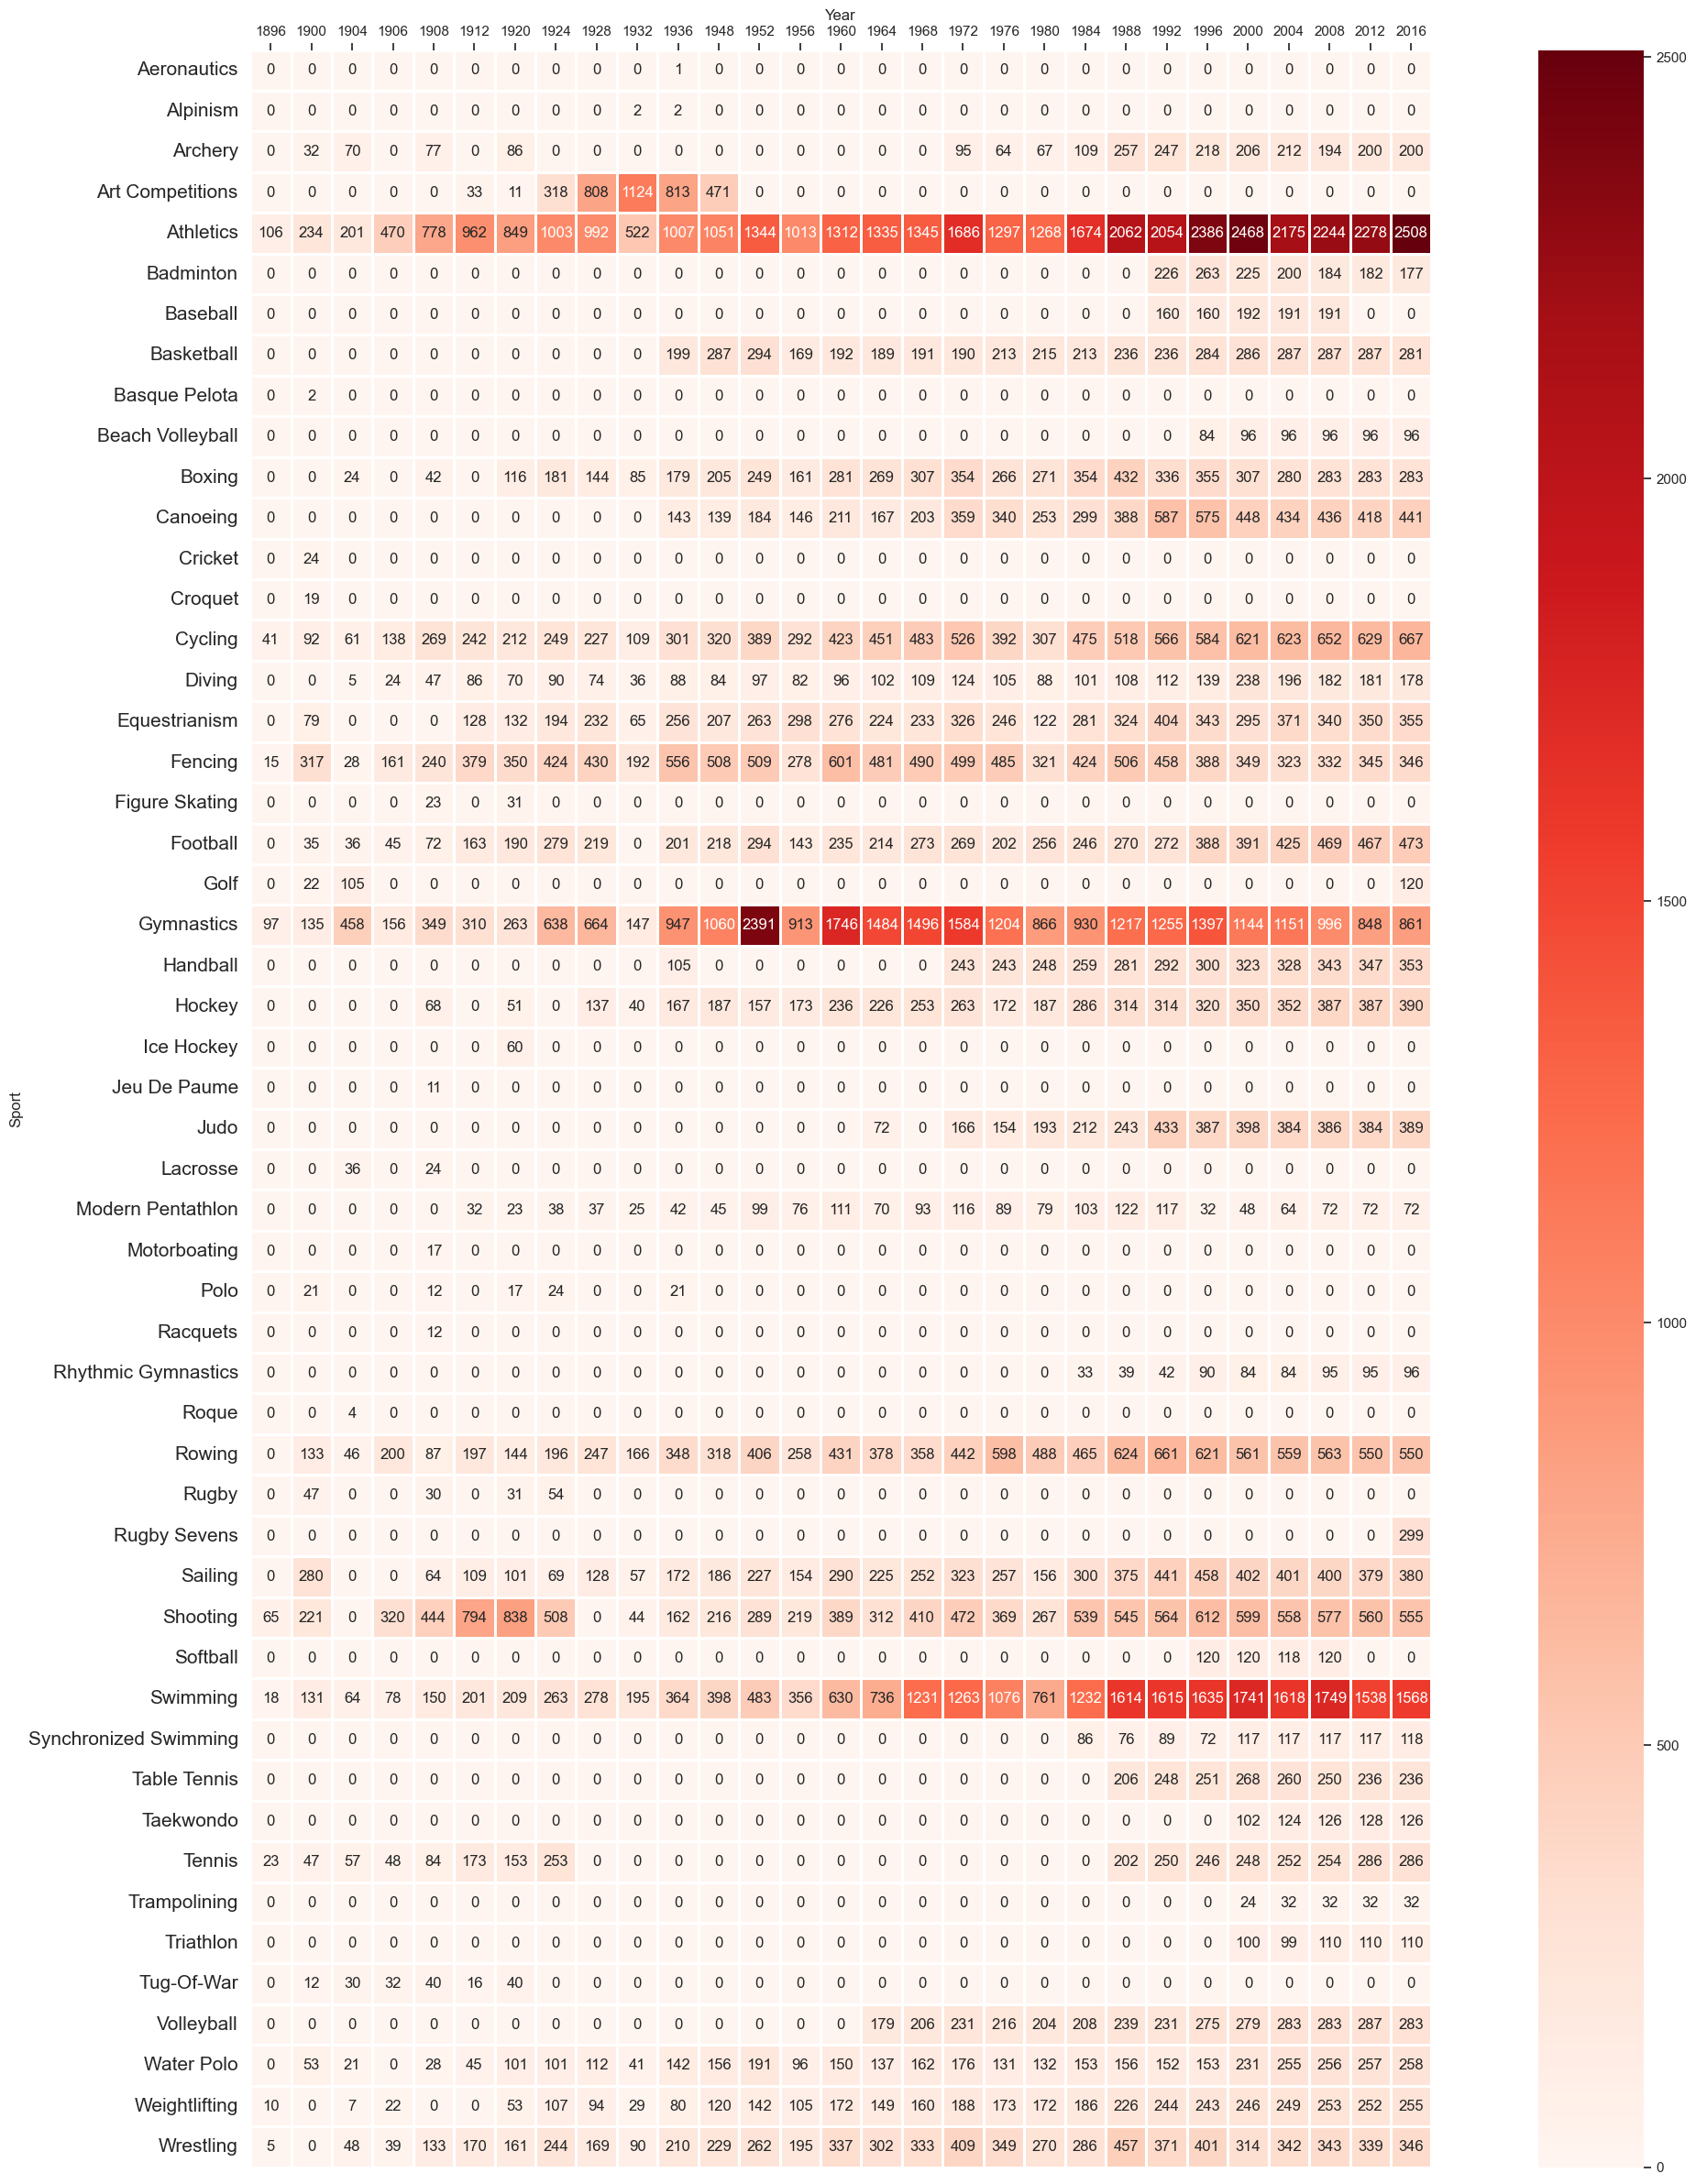

In [24]:
pivot_table = summer_df.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)
heatmap_creator = Heatmap(data=pivot_table, index='Sport', columns='Year', figsize=(30,30), cmap='Reds')
heatmap_creator.create_heatmap()
heatmap_creator.configure_labels(15,15, 'top')

Analogiškus veiksmus atliekame su žiemos datasetu.

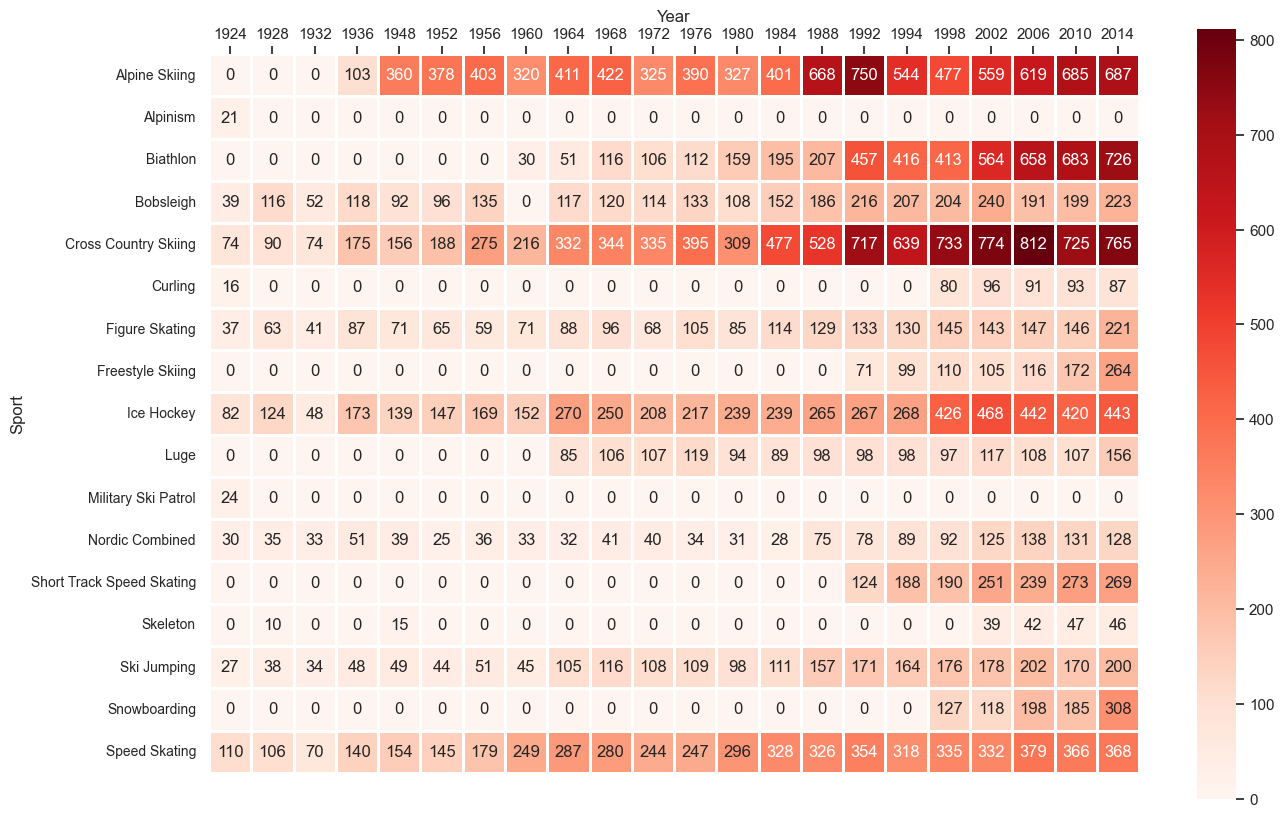

In [25]:
pivot_table = winter_df.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)
heatmap_creator = Heatmap(data=pivot_table, index='Sport', columns='Year', figsize=(15,10), cmap='Reds')
heatmap_creator.create_heatmap()
heatmap_creator.configure_labels(10,10, 'top')

In [129]:
sport_counts_by_year_summer = summer_df.groupby('Year')['Sport'].nunique().reset_index()


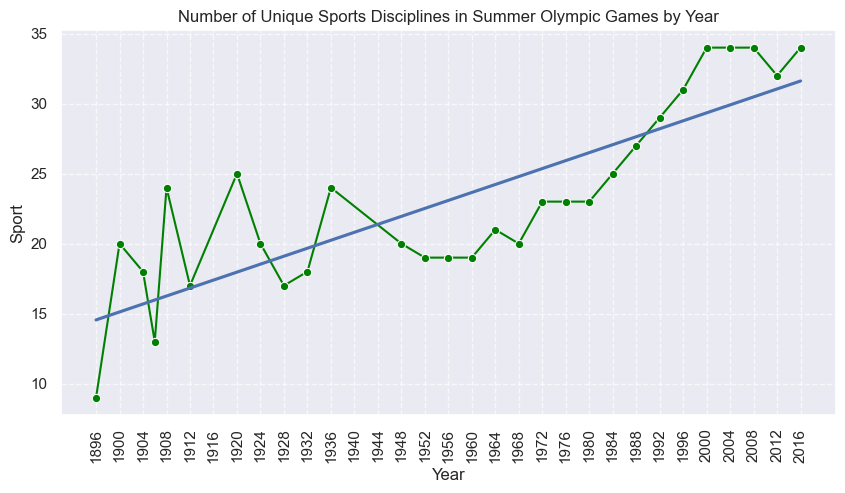

In [26]:
line_plot_main = LinePlot(data=sport_counts_by_year_summer, x='Year', y='Sport')
line_plot_main.create_line_plot(title='Number of Unique Sports Disciplines in Summer Olympic Games by Year')
line_plot_main.configure_xticks(step=4, min_year=1896, max_year=2016)
line_plot_main.regline()

In [27]:
winter_df = main[main['Season'] == 'Winter']
sport_counts_by_year_winter = winter_df.groupby('Year')['Sport'].nunique().reset_index()

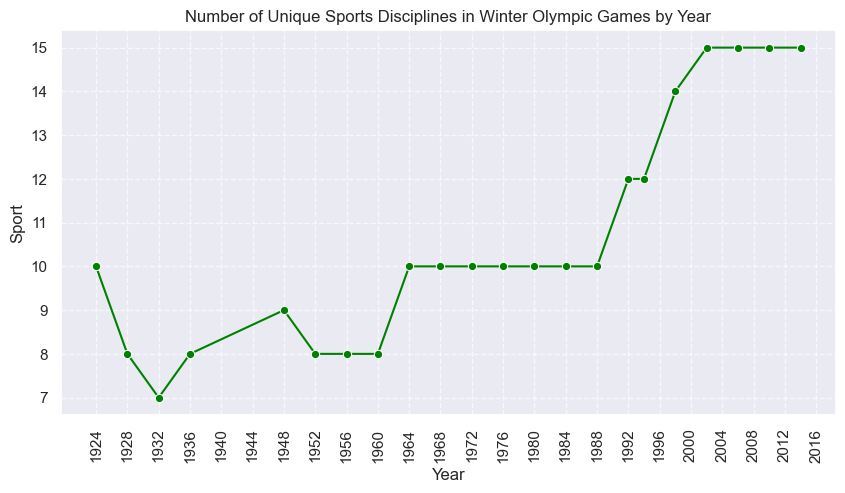

In [28]:
line_plot_main = LinePlot(data=sport_counts_by_year_winter, x='Year', y='Sport')
line_plot_main.create_line_plot(title='Number of Unique Sports Disciplines in Winter Olympic Games by Year')
line_plot_main.configure_xticks(step=4, min_year=1924, max_year=2016)

In [29]:
winter_df_earlier = winter_df[winter_df['Year']< 1988]
max_winter_df_earlier = winter_df_earlier['Year'].max()
max_winter_df_earlier

1984

In [30]:
winter_df_later = winter_df[winter_df['Year']>= 1988]
min_winter_df_late = winter_df_later['Year'].min()
min_winter_df_late

1988

In [31]:
winter_df_later1 = winter_df_later['Sport'].unique().tolist()
for discipline in winter_df_later1:
    print(discipline)

Speed Skating
Cross Country Skiing
Ice Hockey
Biathlon
Alpine Skiing
Bobsleigh
Figure Skating
Nordic Combined
Freestyle Skiing
Luge
Curling
Snowboarding
Ski Jumping
Short Track Speed Skating
Skeleton


In [32]:
winter_df_earlier1 = winter_df_earlier['Sport'].unique().tolist()
for discipline in winter_df_earlier1:
    print(discipline)

Cross Country Skiing
Speed Skating
Luge
Figure Skating
Bobsleigh
Ice Hockey
Nordic Combined
Biathlon
Alpine Skiing
Ski Jumping
Curling
Military Ski Patrol
Skeleton
Alpinism


In [33]:
new_sport_winter = []
for sport in winter_df_later1:
    if sport not in winter_df_earlier1:
        new_sport_winter.append(sport)
print(new_sport_winter)

['Freestyle Skiing', 'Snowboarding', 'Short Track Speed Skating']


In [34]:
summer_df_earlier = summer_df[summer_df['Year']< 1980]
max_summer_df_earlier = summer_df_earlier['Year'].max()
max_summer_df_earlier

summer_df_later = summer_df[summer_df['Year']>= 1980]
min_summer_df_later = summer_df_later['Year'].min()
min_summer_df_later

summer_df_later1 = summer_df_later['Sport'].unique().tolist()
summer_df_earlier1 = summer_df_earlier['Sport'].unique().tolist()

In [35]:
new_sport_summer = []
for sport in summer_df_later1:
	if sport not in summer_df_earlier1:
		new_sport_summer.append(sport)
print(new_sport_summer)

['Badminton', 'Taekwondo', 'Softball', 'Synchronized Swimming', 'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon']


In [36]:
summer_sports = summer_df['Sport']
winter_sports = winter_df['Sport']

summer_sports_set = set(summer_df['Sport'])
winter_sports_set = set(winter_df['Sport'])

In [37]:
sport_in_both_games = set(summer_sports).intersection(winter_sports)
sport_in_both_games_list = list(sport_in_both_games)

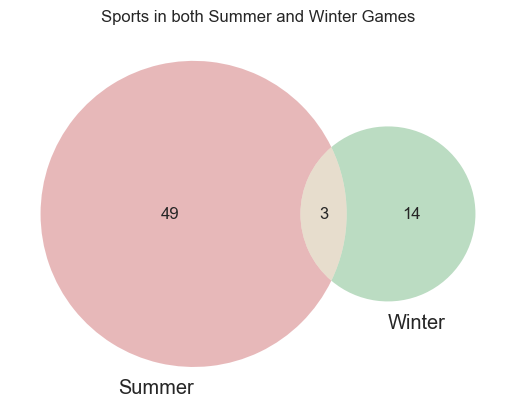

Sports in both games: Ice Hockey. Alpinism. Figure Skating. 


In [38]:
set1 = summer_sports_set
set2 = winter_sports_set

# Create a Venn diagram
venn2([set1, set2], set_labels=('Summer', 'Winter'))

# Show the plot
plt.title('Sports in both Summer and Winter Games')
plt.show()
print('Sports in both games:', end=' ')
for sports in sport_in_both_games_list:
    print(sports, end='. ')
print()

In [39]:
winter_in_summer = summer_df[summer_df['Sport'].isin(sport_in_both_games)]
min_value = winter_in_summer['Year'].min()
max_value = winter_in_summer['Year'].max()
print(min_value, max_value)

1908 1936


<Figure size 1000x500 with 0 Axes>

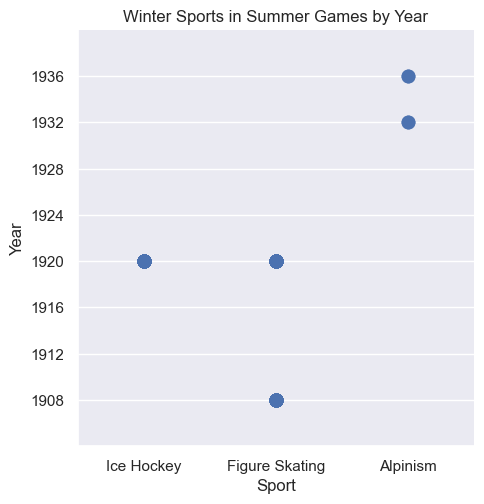

In [40]:
catplot_winter_in_summer = Catplot(data=winter_in_summer,y='Year', x='Sport')
catplot_winter_in_summer.create_catplot(title='Winter Sports in Summer Games by Year')
catplot_winter_in_summer.set_ylim_ticks(ylim_min=1904, ylim_max=1940, min=min_value, max=max_value, step=4, rotation=0)

2 dalis. Medalių pasiskirstymas

In [41]:
goldMedals = main[(main['Medal'] == 'Gold')]
goldMedals.head()



,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


Text(0.5, 1.0, 'Gold Medal distribution by Age')

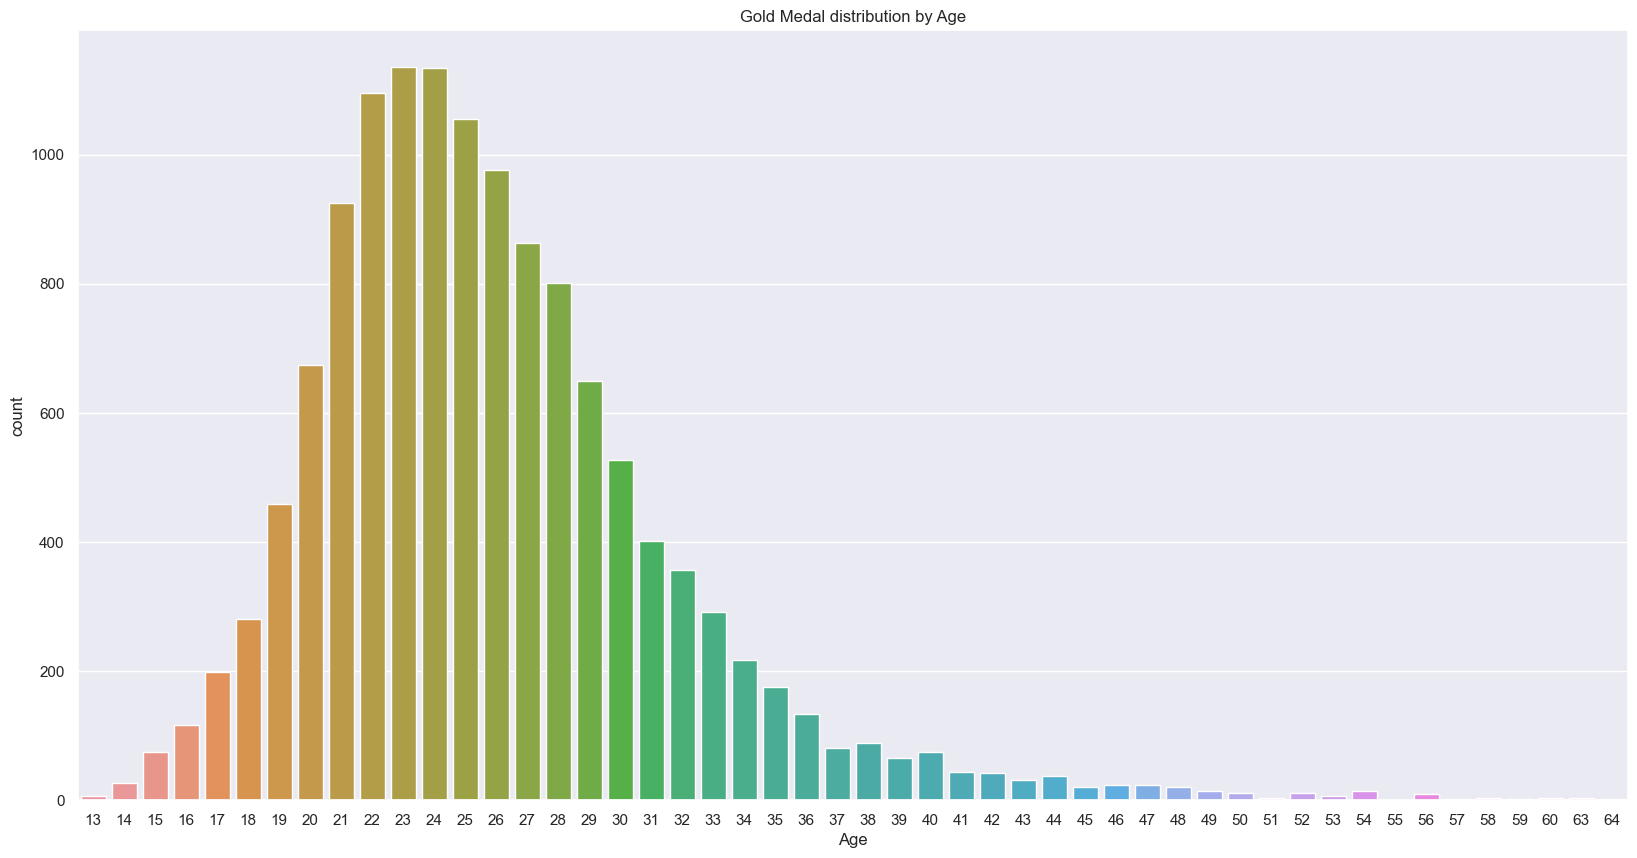

In [42]:
goldMedals_dropedna = main[(main['Medal'] == 'Gold')]
goldMedals_dropedna = goldMedals_dropedna[np.isfinite(goldMedals_dropedna['Age'])]
goldMedals_dropedna['Age'] = goldMedals_dropedna['Age'].astype(int)
plt.figure(figsize=(20, 10))
sns.countplot(data=goldMedals_dropedna, x='Age')
plt.title('Gold Medal distribution by Age')



In [43]:
goldMedals_greater40 = goldMedals_dropedna[goldMedals_dropedna['Age']>=40]
goldMedals_greater40

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
974,Nils August Domingo Adlercreutz,M,45,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Team",Gold,Sweden,NaN
1858,Fehaid Al-Deehani,M,49,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,Individual Olympic Athletes
2025,Ahmed bin Hasher Al-Maktoum,M,40,175.0,67.0,United Arab Emirates,UAE,2004 Summer,2004,Summer,Athina,Shooting,Shooting Men's Double Trap,Gold,United Arab Emirates,NaN
2735,Sergey Gennadyevich Alifirenko,M,41,168.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Gold,Russia,NaN
2785,Alphonse Allaert,M,44,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 33 metres, Team",Gold,Belgium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131533,Emily Woodruff (Smiley-),F,58,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
131700,Frank Seymour Wright,M,41,174.0,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Trap, Team",Gold,USA,NaN
133226,Mahonri Mackintosh Young,M,54,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",Gold,USA,NaN


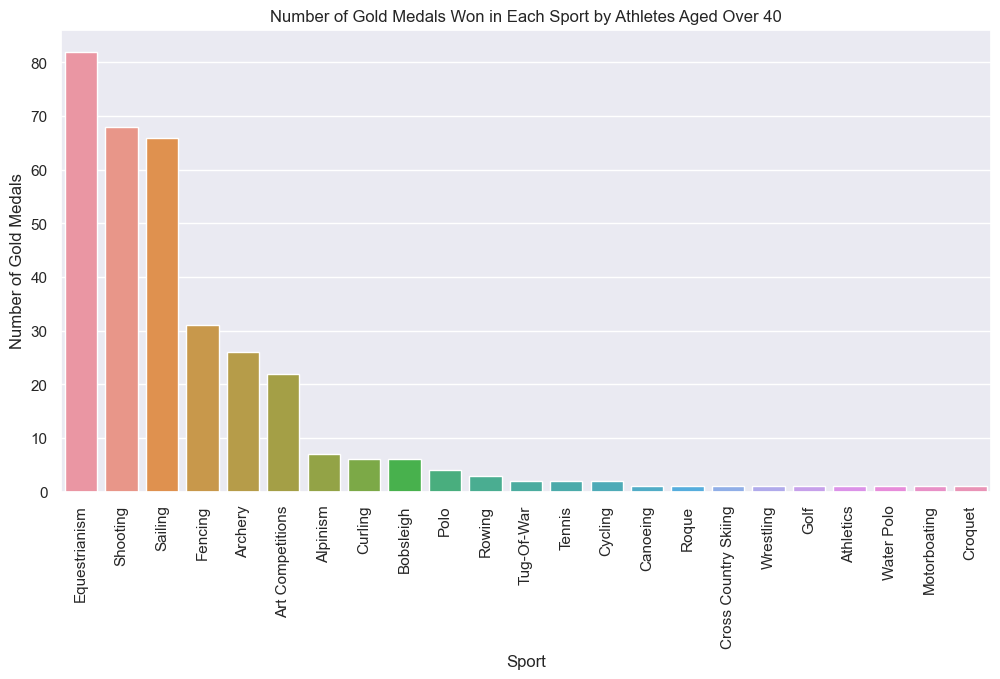

In [44]:
filtered_data = goldMedals_dropedna[(goldMedals_dropedna['Age'] > 40) & (goldMedals_dropedna['Medal'] == 'Gold')]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Sport', order=filtered_data['Sport'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Sport')
plt.ylabel('Number of Gold Medals')
plt.title('Number of Gold Medals Won in Each Sport by Athletes Aged Over 40')
plt.show()



Text(0.5, 1.0, 'Disciplines with Most Gold by Athletes Aged 40+')

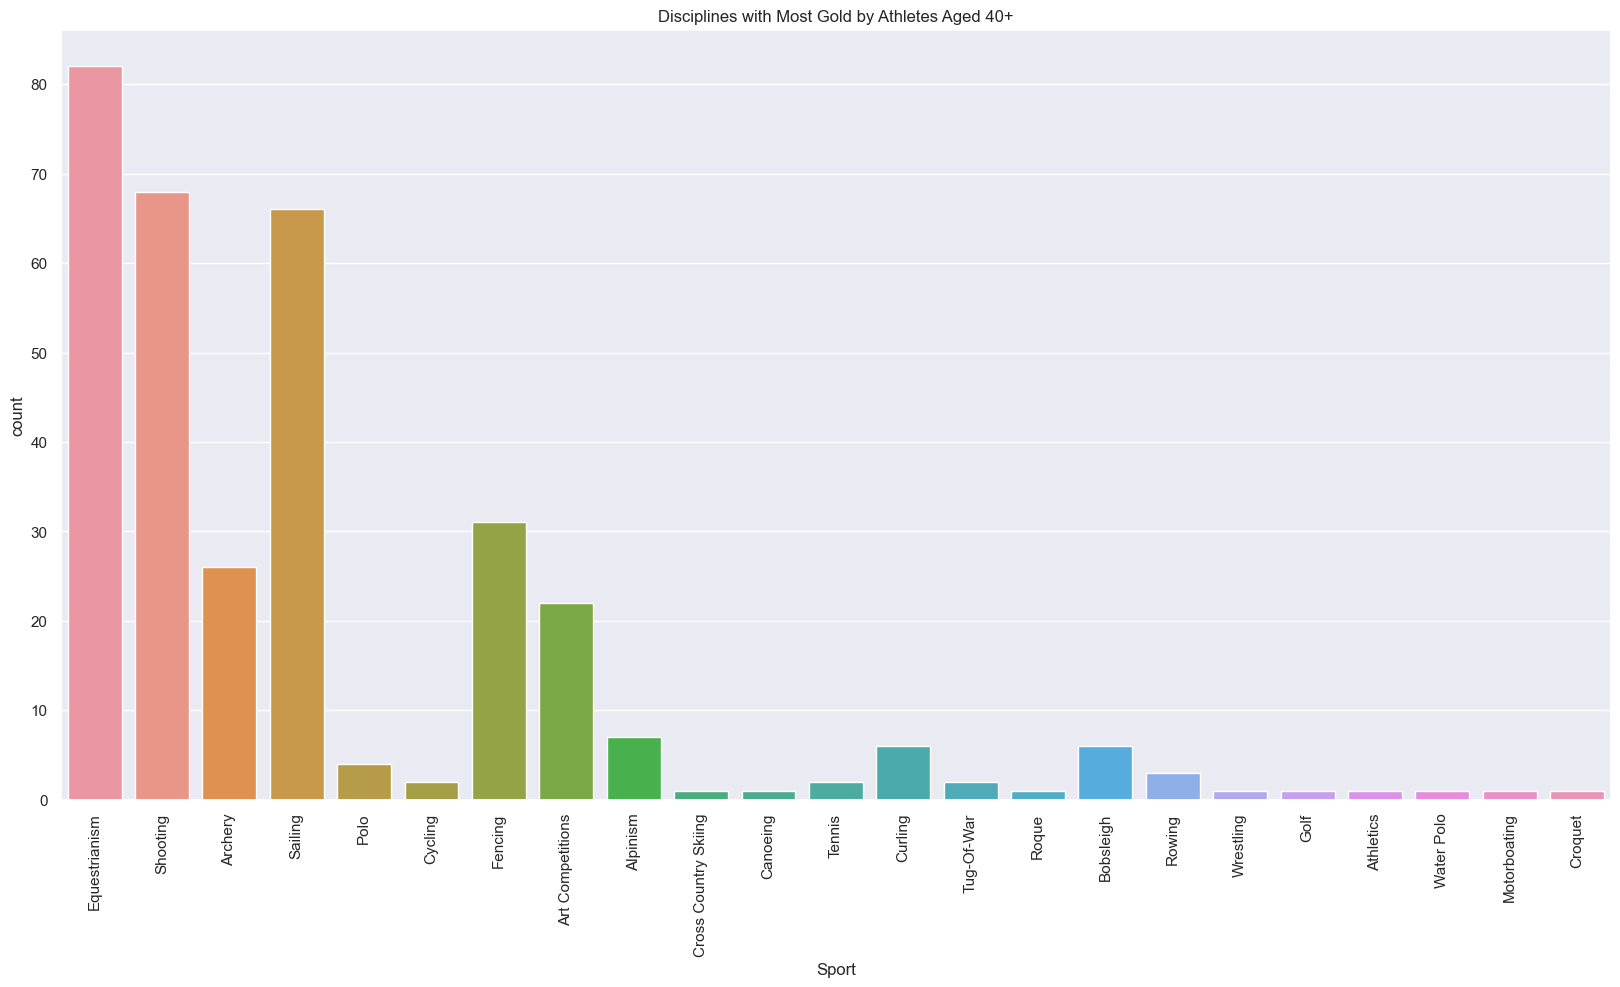

In [45]:
data = goldMedals_dropedna["Sport"][goldMedals_dropedna["Age"]>40]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=goldMedals_dropedna, x=data)
plt.xticks(rotation=90)
plt.title("Disciplines with Most Gold by Athletes Aged 40+")


Text(0.5, 1.0, 'Most Gold by Athletes Aged 40+ by Year')

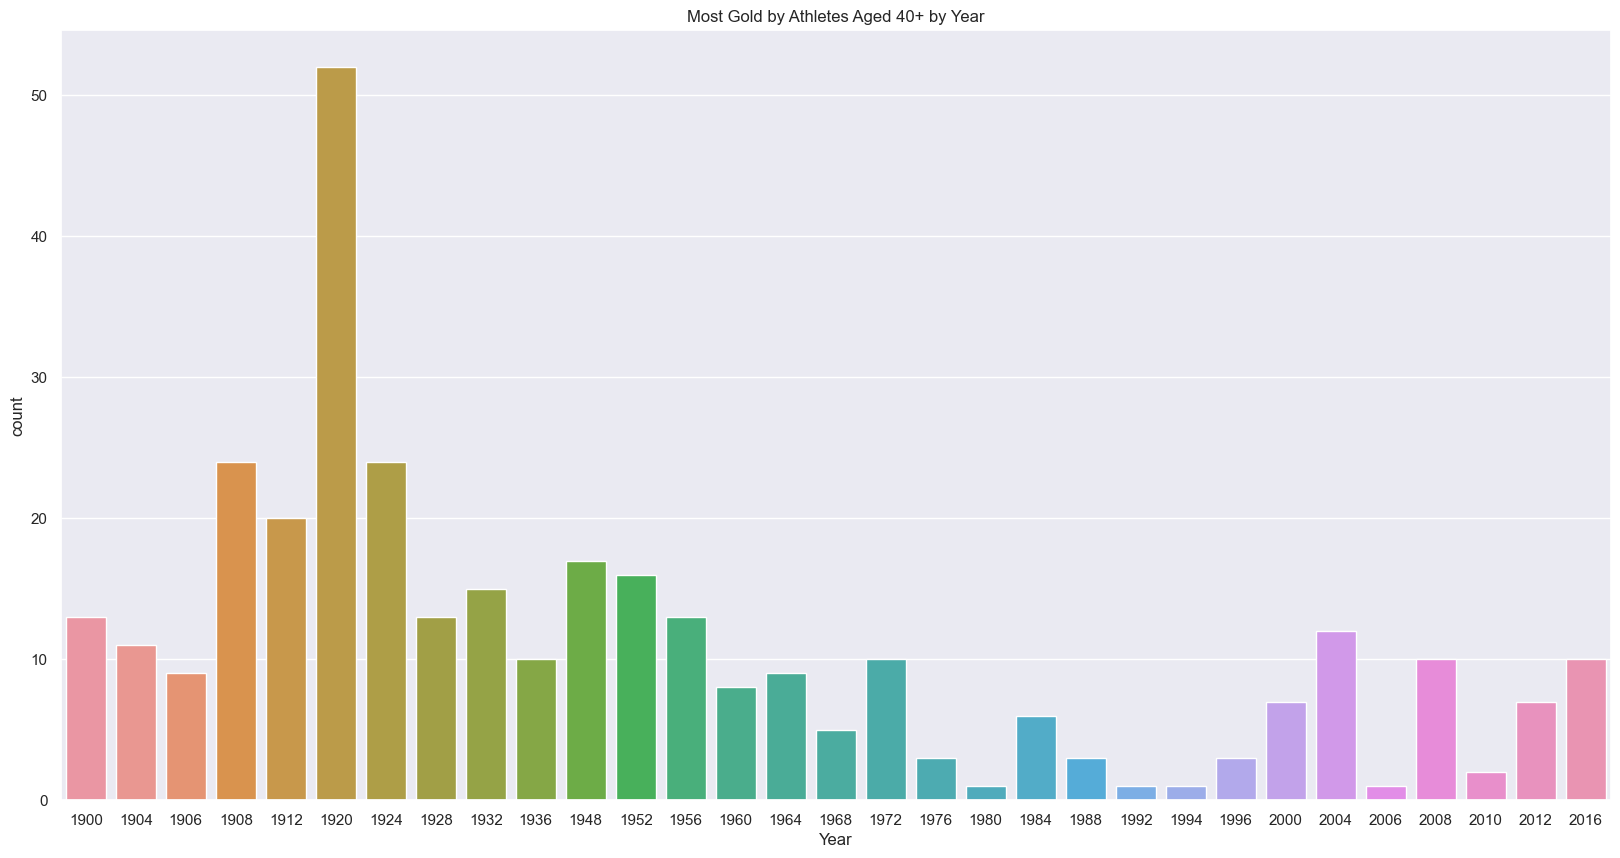

In [46]:
greater40_year = goldMedals_dropedna["Year"][goldMedals_dropedna["Age"]>40]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=goldMedals_dropedna, x=greater40_year)
plt.title('Most Gold by Athletes Aged 40+ by Year')



In [47]:
average_age_by_year = goldMedals_dropedna.groupby('Year')['Age'].mean()
average_age_by_year = average_age_by_year.to_frame().reset_index()
average_age_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    35 non-null     int64  
 1   Age     35 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


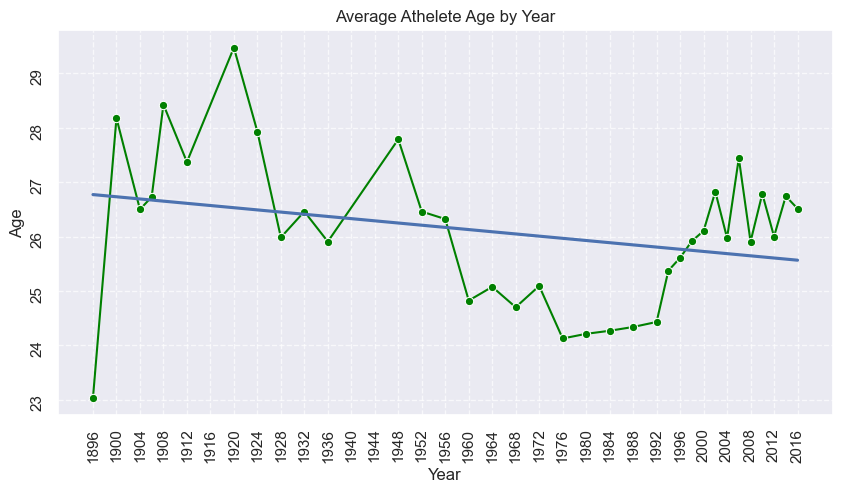

In [48]:
yearaverage_lineplot = LinePlot(x='Year', y='Age', data = average_age_by_year)
yearaverage_lineplot.create_line_plot(title='Average Athelete Age by Year')
yearaverage_lineplot.configure_xticks(min_year=1896,max_year=2016,step=4)
yearaverage_lineplot.configure_yticks(min=23,max=31,step=1)
yearaverage_lineplot.regline()

In [49]:
golds1896 = goldMedals_dropedna[(goldMedals_dropedna['Year'] == 1896)]
print(golds1896['Age'].min())
print(golds1896['Age'].max())

18
31


In [50]:
summer_df_age = summer_df[np.isfinite(summer_df['Age'])]
winter_df_age = winter_df[np.isfinite(winter_df['Age'])]

average_age_by_year_summer = summer_df_age.groupby('Year')['Age'].mean()
average_age_by_year_summer = average_age_by_year_summer.to_frame().reset_index()

average_age_by_year_winter = winter_df_age.groupby('Year')['Age'].mean()
average_age_by_year_winter = average_age_by_year_winter.to_frame().reset_index()

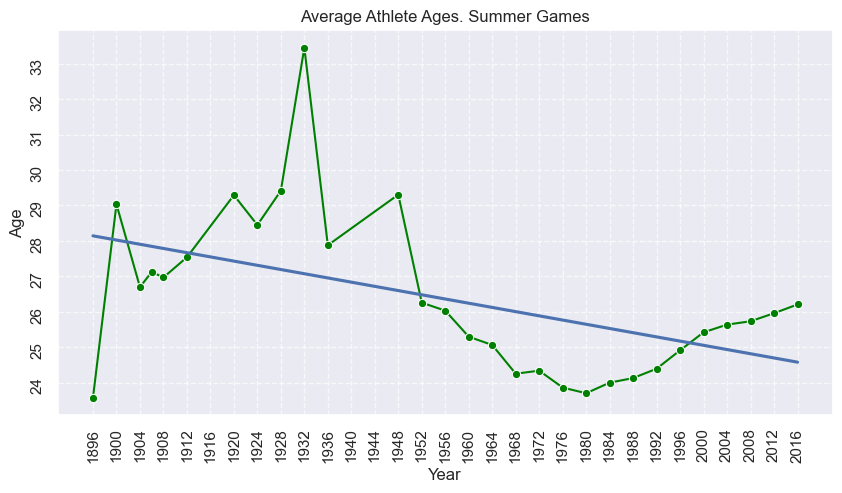

In [51]:
average_age_summer_plot = LinePlot(x='Year', y='Age', data=average_age_by_year_summer)
average_age_summer_plot.create_line_plot(title='Average Athlete Ages. Summer Games')
average_age_summer_plot.configure_xticks(min_year=1896,max_year=2016,step=4)
average_age_summer_plot.configure_yticks(min=23,max=34,step=1)
average_age_summer_plot.regline()

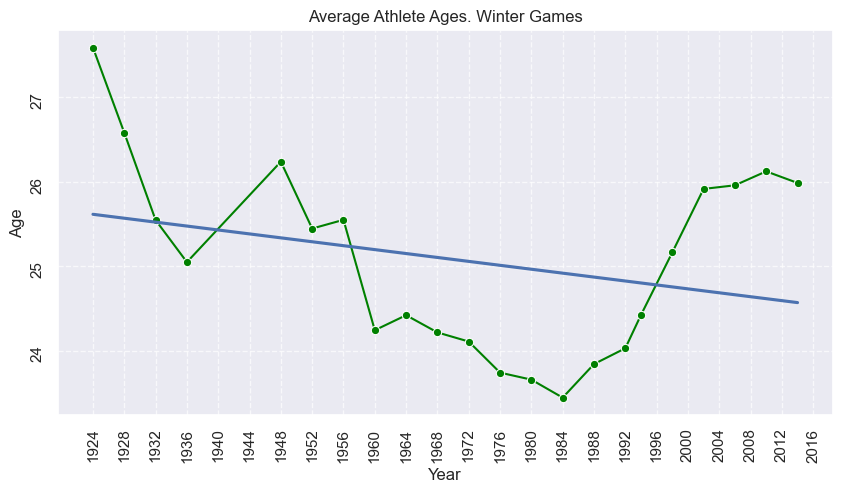

In [52]:
average_age_winter_plot = LinePlot(x='Year', y='Age', data=average_age_by_year_winter)
average_age_winter_plot.create_line_plot(title='Average Athlete Ages. Winter Games')
average_age_winter_plot.configure_xticks(min_year=1924,max_year=2016,step=4)
average_age_winter_plot.configure_yticks(min=23,max=28,step=1)
average_age_winter_plot.regline()

In [53]:
younger_18 = (goldMedals_dropedna["Age"] <= 18).sum()


In [54]:
younger_18_sport = goldMedals_dropedna['Sport'][goldMedals_dropedna['Age']<=18]
younger_18_sport_counted = younger_18_sport.value_counts().to_frame().reset_index()
younger_18_sport_counted.columns = ['Sport', 'Counts']



In [55]:
older_40_sport = goldMedals_dropedna['Sport'][goldMedals_dropedna['Age']>=40]
older_40_sport_counted = older_40_sport.value_counts().to_frame().reset_index()
older_40_sport_counted.columns = ['Sport', 'Counts']

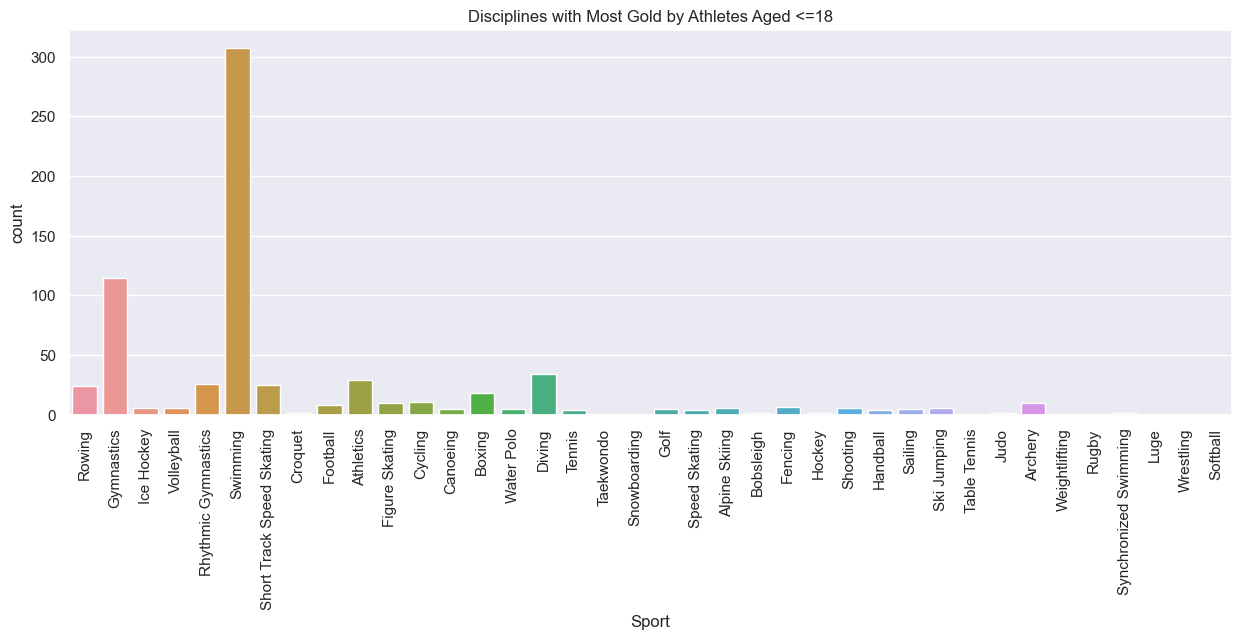

In [56]:
younger_18_sport = goldMedals_dropedna['Sport'][goldMedals_dropedna['Age']<=18]
plt.figure(figsize = (15, 5))
plt.tight_layout()
sns.countplot(data=goldMedals_dropedna, x=younger_18_sport)
plt.title("Disciplines with Most Gold by Athletes Aged <=18")
plt.xticks(rotation=90) 
plt.show()

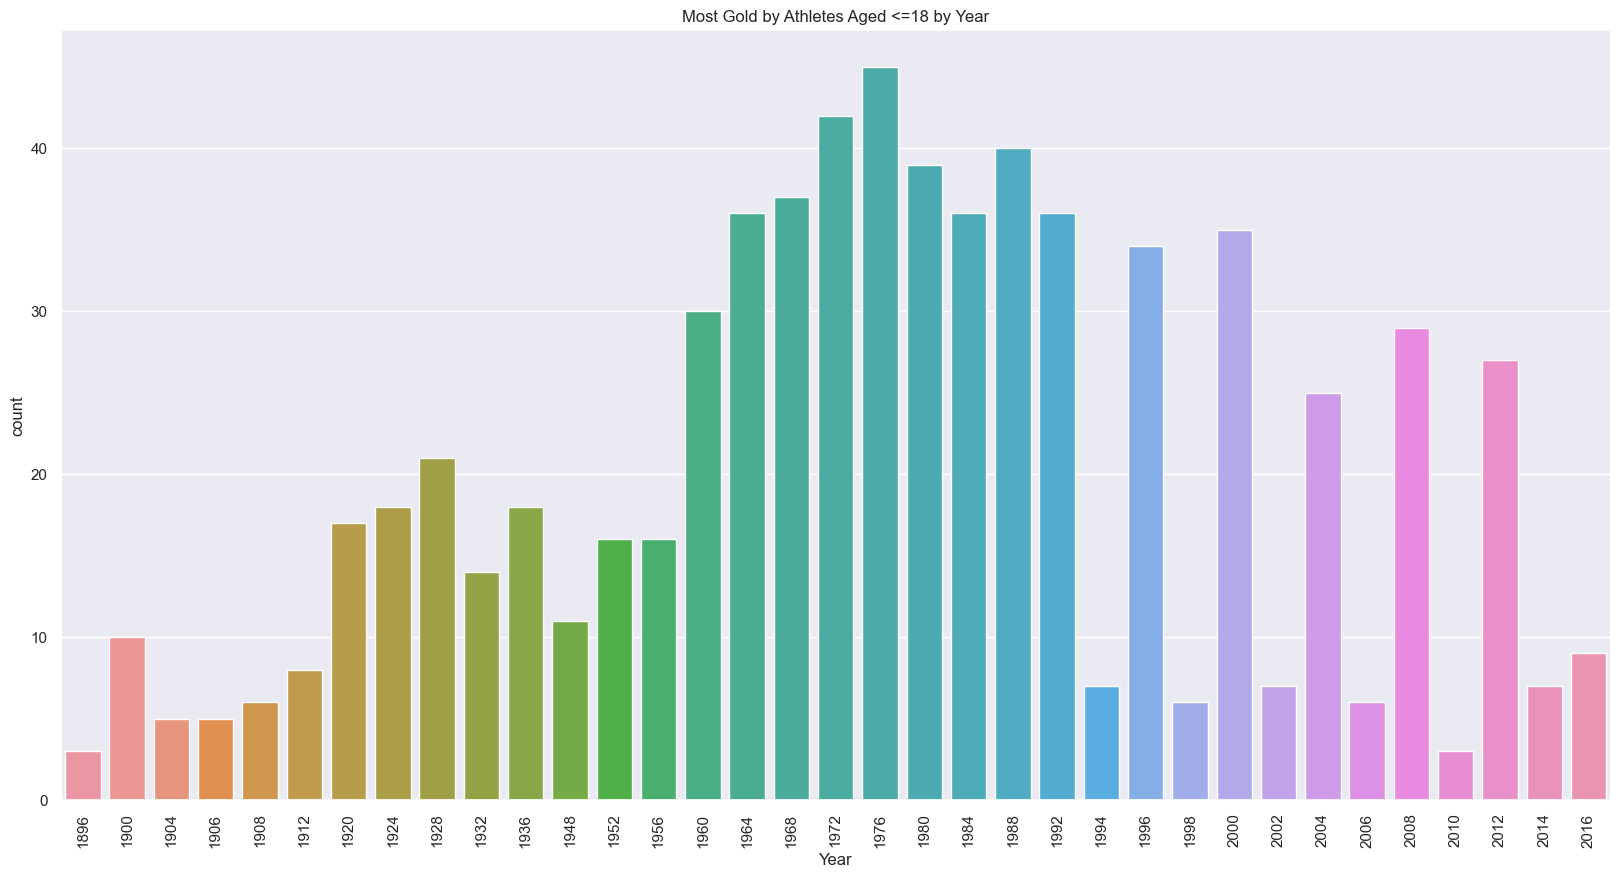

In [57]:
younger_18_year = goldMedals_dropedna["Year"][goldMedals_dropedna["Age"]<=18]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=goldMedals_dropedna, x=younger_18_year)
plt.title("Most Gold by Athletes Aged <=18 by Year")
plt.xticks(rotation=90) 
plt.show()

In [58]:
top_10_younger_18_sports = younger_18_sport_counted.sort_values(by='Counts', ascending=False).head(10)
top_10_older_40_sports = older_40_sport_counted.sort_values(by='Counts', ascending=False).head(10)

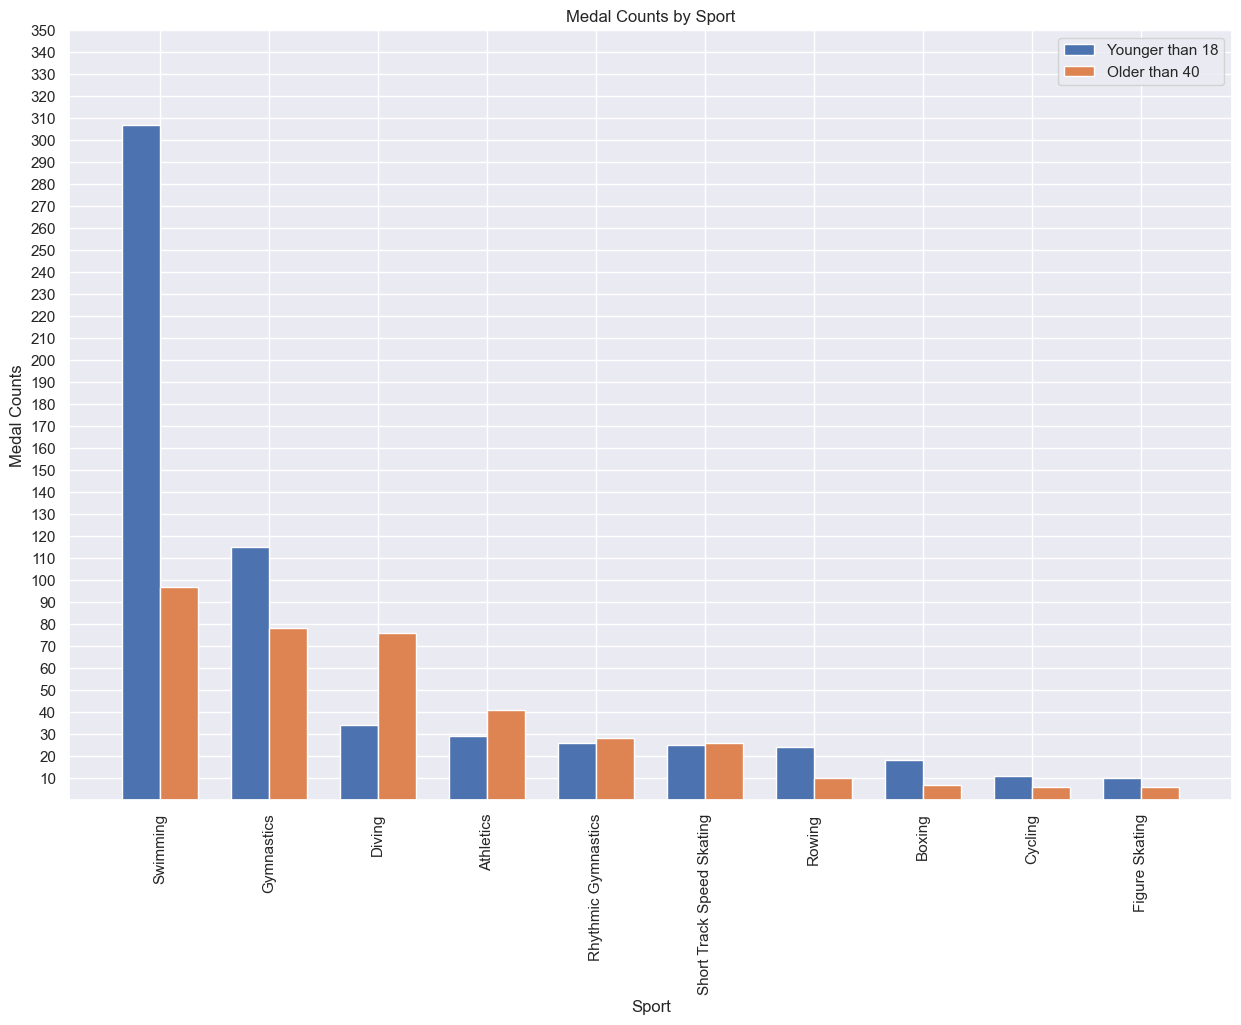

In [59]:
plot = GroupedBarPlot(
    data1=top_10_younger_18_sports['Counts'],
    data2=top_10_older_40_sports['Counts'],
    labels=top_10_younger_18_sports['Sport'],
    label1='Younger than 18',
    label2='Older than 40'
)

plot.create_bar_plot(title='Medal Counts by Sport', xlabel='Sport', ylabel='Medal Counts', figsize=(15,10))
plot.set_legend_labels(label1='Younger than 18', label2='Older than 40')
plot.adjust_yticks(min=10,max=350,step=10)


In [60]:
lithuanian_participation = main[(main['region']=='Lithuania')]

In [61]:
lithuanian_participation

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
1000,Dainius Adomaitis,M,26.0,202.0,100.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze,Lithuania,NaN
1001,Svajnas Adomaitis,M,19.0,175.0,55.0,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",NaN,Lithuania,NaN
1004,Aurimas Adomaviius,M,22.0,204.0,100.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,NaN,Lithuania,NaN
1477,Neringa Aidietyt,F,29.0,177.0,60.0,Lithuania,LTU,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 20 kilometres Walk,NaN,Lithuania,NaN
1477,Neringa Aidietyt,F,33.0,177.0,60.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 20 kilometres Walk,NaN,Lithuania,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,Vladislavas Zybaila,M,27.0,178.0,75.0,Lithuania,LTU,2002 Winter,2002,Winter,Salt Lake City,Cross Country Skiing,Cross Country Skiing Men's Sprint,NaN,Lithuania,NaN
135551,Vladislavas Zybaila,M,27.0,178.0,75.0,Lithuania,LTU,2002 Winter,2002,Winter,Salt Lake City,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN,Lithuania,NaN
135551,Vladislavas Zybaila,M,27.0,178.0,75.0,Lithuania,LTU,2002 Winter,2002,Winter,Salt Lake City,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,Lithuania,NaN


In [62]:
lithuanian_participation['Year'].min()

1924

In [63]:
lithuanian_participation['Year'].max()

2016

In [64]:
lithuanian_participation_count = lithuanian_participation.groupby(['Year', 'Season']).size().reset_index(name='count')
lithuanian_participation_count = lithuanian_participation_count.sort_values(['count'], ascending=False).reset_index(drop=True)
lithuanian_participation_count.index +=1
lithuanian_participation_count

,Year,Season,count
1,1996,Summer,81
2,2016,Summer,80
3,2008,Summer,78
4,2000,Summer,77
5,2012,Summer,72
6,2004,Summer,70
7,1992,Summer,54
8,2002,Winter,21
9,2014,Winter,20
10,1998,Winter,18


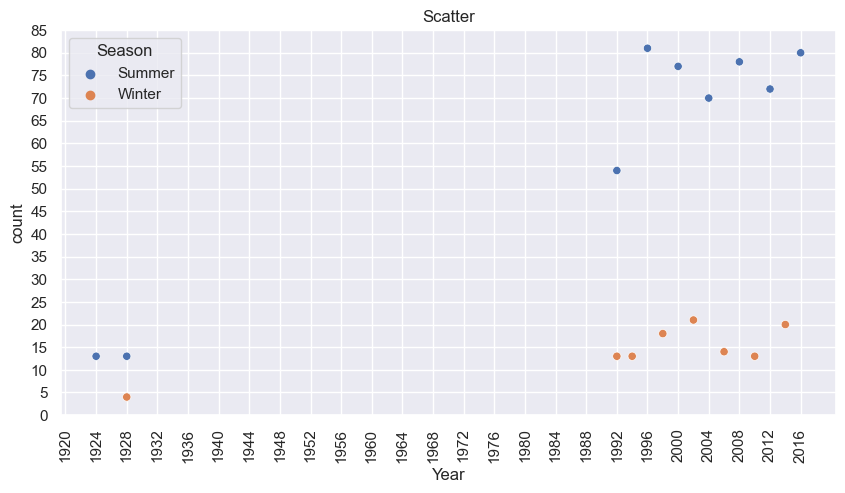

In [65]:
participation_scatter = ScatterPlot(data=lithuanian_participation_count,x='Year', y='count', hue='Season')
participation_scatter.create_scatterplot(title='Scatter', figsize=(10,5))
participation_scatter.set_xticks(min=1920, max=2016, step=4, rotation=90)
participation_scatter.set_yticks(min=0, max=85, step=5)

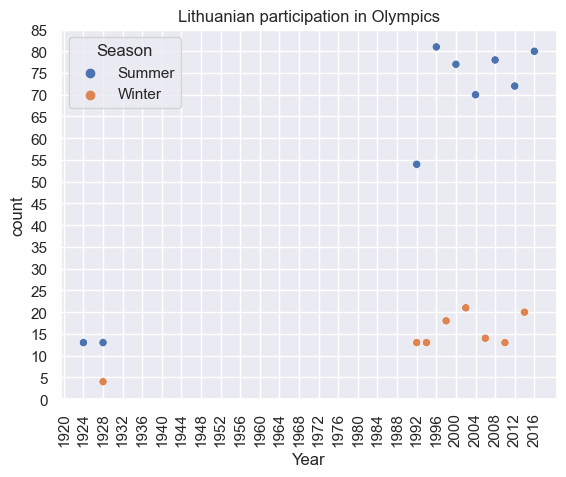

In [66]:
sns.scatterplot(data=lithuanian_participation_count,x='Year', y='count', hue='Season')
plt.title('Lithuanian participation in Olympics')
plt.xticks(range(1920, 2016 + 4, 4),rotation=90)
plt.yticks(range(0, 85 + 5, 5))
plt.show()


In [67]:
# lithuanian_participation_lineplot = LinePlot(data=lithuanian_participation_count, x='Year', y='count')
# lithuanian_participation_lineplot.create_line_plot(title='Lithuanian participation in Olympics')
# lithuanian_participation_lineplot.configure_xticks(min_year=1924, max_year=2016, step=4)
# lithuanian_participation_lineplot.configure_yticks(min=0,max=90, step=5)

In [68]:
lithuanian_participation_summer = lithuanian_participation = main[(main['region']=='Lithuania') & (main['Season'] == 'Summer')]
lithuanian_participation_winter = lithuanian_participation = main[(main['region']=='Lithuania') & (main['Season'] == 'Winter')]

In [69]:
# lithuanian_participation_summer_count = lithuanian_participation_summer['Year'].value_counts()
# lithuanian_participation_summer_count = lithuanian_participation_summer_count.to_frame().reset_index()
# lithuanian_participation_summer_count

In [70]:
# lithuanian_participation_lineplot_summer = LinePlot(data=lithuanian_participation_summer_count, x='Year', y='count')
# lithuanian_participation_lineplot_summer.create_line_plot(title='Lithuanians in Summer Games')
# lithuanian_participation_lineplot_summer.configure_xticks(min_year=1924, max_year=2016, step=4)
# lithuanian_participation_lineplot_summer.configure_yticks(min=0,max=90, step=10)

In [71]:
# lithuanian_participation_winter_count = lithuanian_participation_winter['Year'].value_counts()
# lithuanian_participation_winter_count = lithuanian_participation_winter_count.to_frame().reset_index()
# lithuanian_participation_winter_count

In [72]:
# lithuanian_participation_lineplot_winter = LinePlot(data=lithuanian_participation_winter_count, x='Year', y='count')
# lithuanian_participation_lineplot_winter.create_line_plot(title='Lithuanians in Winter Games')
# lithuanian_participation_lineplot_winter.configure_xticks(min_year=1924, max_year=2016, step=4)
# lithuanian_participation_lineplot_winter.configure_yticks(min=0,max=30, step=10)

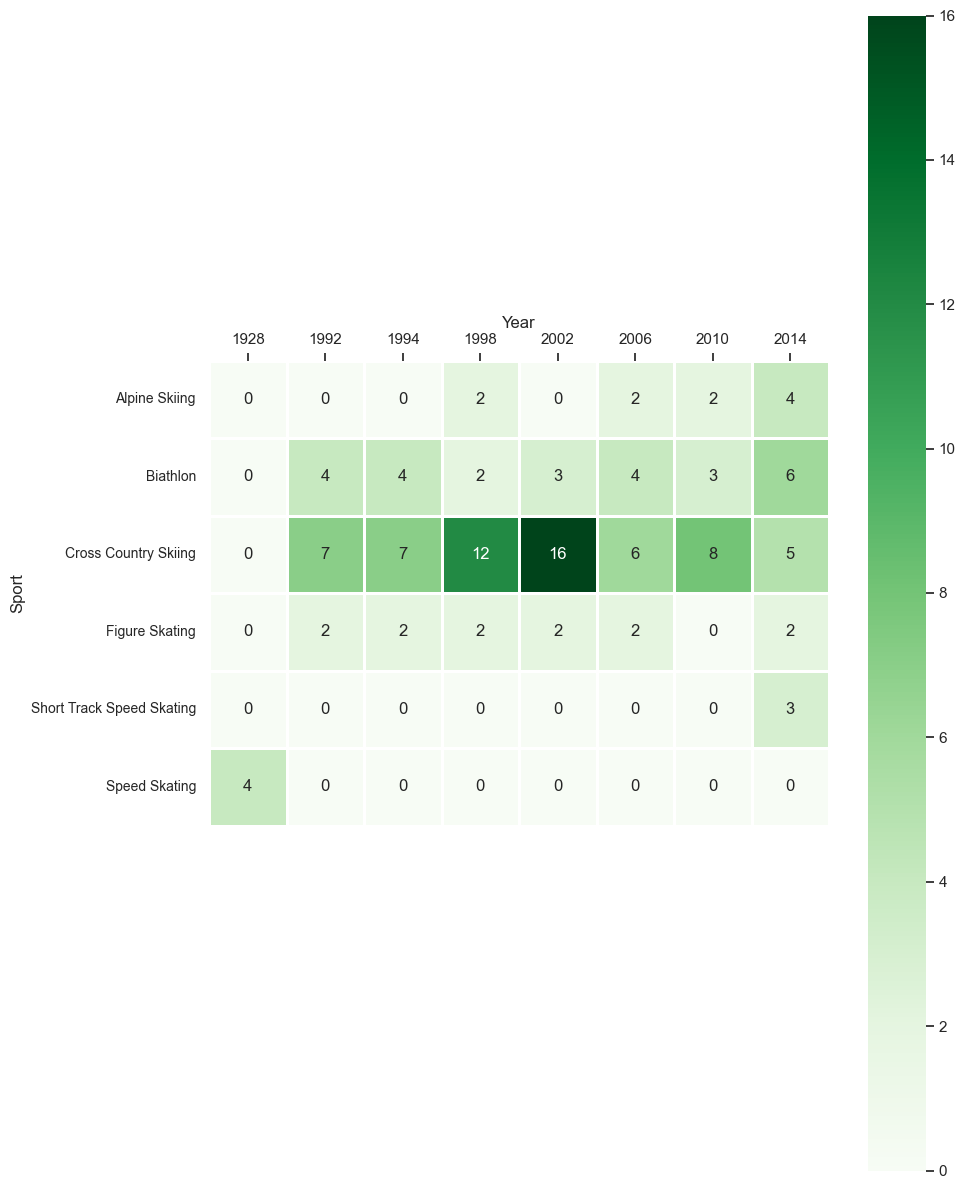

In [73]:
pivot_table = lithuanian_participation.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)

lithuanians_heatmap = Heatmap(data=pivot_table, index='Sport', columns='Year', figsize=(10,15), cmap='Greens')
lithuanians_heatmap.create_heatmap()
lithuanians_heatmap.configure_labels(10,10, 'top')

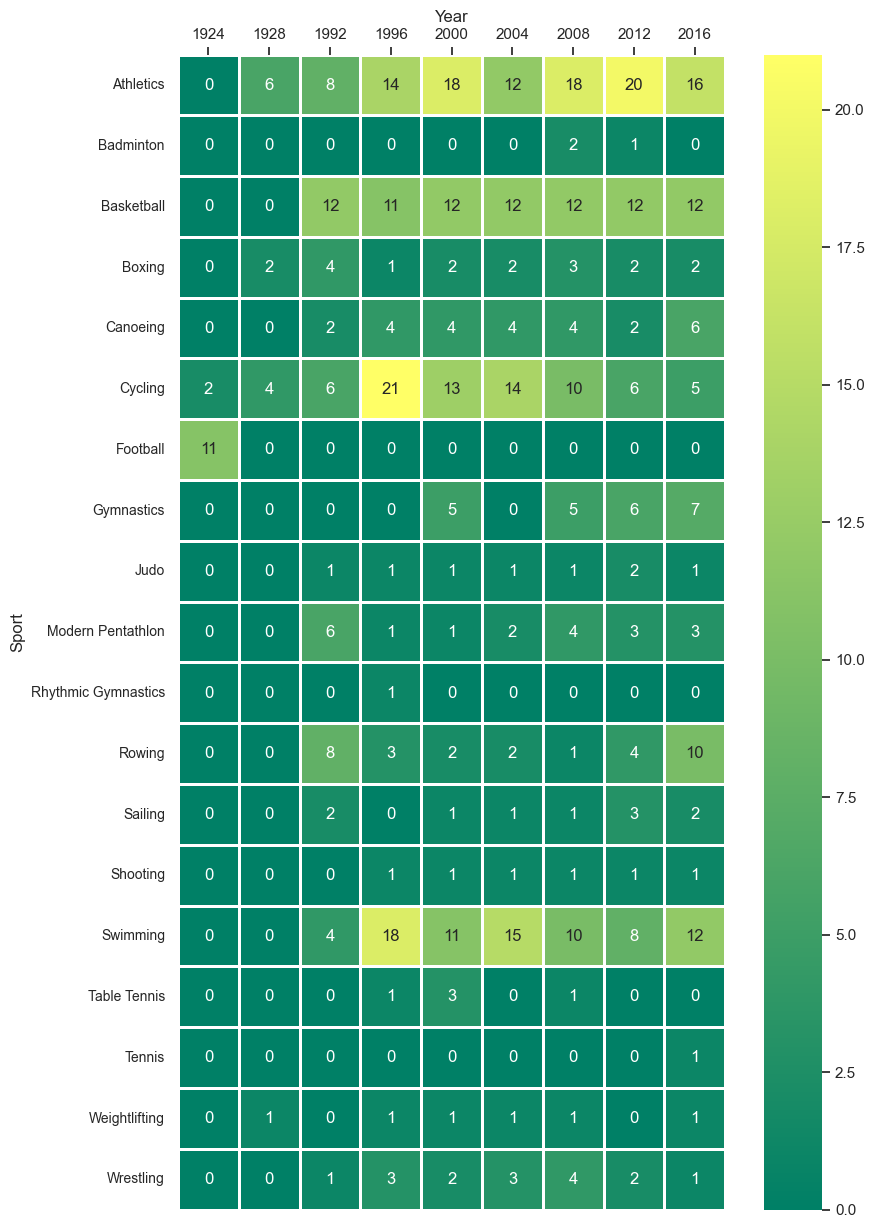

In [74]:
pivot_table = lithuanian_participation_summer.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)

lithuanians_heatmap_summer = Heatmap(data=pivot_table, index='Sport', columns='Year', figsize=(10,15), cmap='summer')
lithuanians_heatmap_summer.create_heatmap()
lithuanians_heatmap_summer.configure_labels(10,10, 'top')

In [75]:
lithuanian_medals = main[(main['region'] == 'Lithuania') & pd.notna(main['Medal'])]
lithuanian_medals

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
1000,Dainius Adomaitis,M,26.0,202.0,100.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze,Lithuania,NaN
2469,Virgilijus Alekna,M,28.0,200.0,130.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Discus Throw,Gold,Lithuania,NaN
2469,Virgilijus Alekna,M,32.0,200.0,130.0,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Discus Throw,Gold,Lithuania,NaN
2469,Virgilijus Alekna,M,36.0,200.0,130.0,Lithuania,LTU,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Discus Throw,Bronze,Lithuania,NaN
5453,Laura Asadauskait-Zadneprovskien,F,28.0,160.0,49.0,Lithuania,LTU,2012 Summer,2012,Summer,London,Modern Pentathlon,Modern Pentathlon Women's Individual,Gold,Lithuania,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133642,Andrejus Zadneprovskis,M,33.0,176.0,74.0,Lithuania,LTU,2008 Summer,2008,Summer,Beijing,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze,Lithuania,NaN
134996,Diana ilit,F,24.0,162.0,61.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Cycling,"Cycling Women's Road Race, Individual",Bronze,Lithuania,NaN
135401,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze,Lithuania,NaN


In [76]:
lithuanian_medals_count = lithuanian_medals['Medal'].value_counts().reset_index()

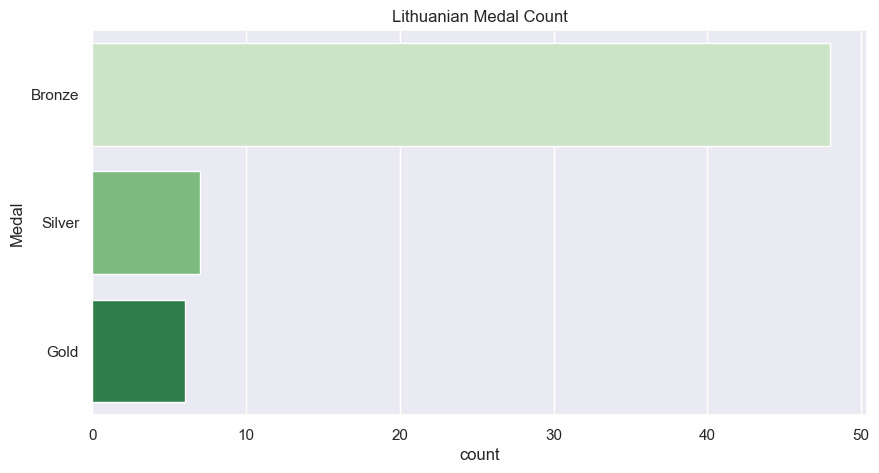

In [77]:
lithuanian_medals_count_bar = BarPlot(data=lithuanian_medals_count, x='count', y='Medal')
bar_graph = lithuanian_medals_count_bar.create_bar_plot(title="Lithuanian Medal Count", palette='Greens', figsize=(10,5))


In [78]:
lithuanian_gold = main[(main['region'] == 'Lithuania') & (main['Medal']=='Gold')]
lithuanian_silver = main[(main['region'] == 'Lithuania') & (main['Medal']=='Silver')]
lithuanian_bronze = main[(main['region'] == 'Lithuania') & (main['Medal']=='Bronze')]

In [79]:
lithuanian_gold_count = lithuanian_gold['Sport'].value_counts().reset_index()
lithuanian_silver_count = lithuanian_silver['Sport'].value_counts().reset_index()
lithuanian_bronze_count = lithuanian_bronze['Sport'].value_counts().reset_index()

In [80]:
lithuanian_gold_count

,Sport,count
0,Athletics,3
1,Modern Pentathlon,1
2,Shooting,1
3,Swimming,1


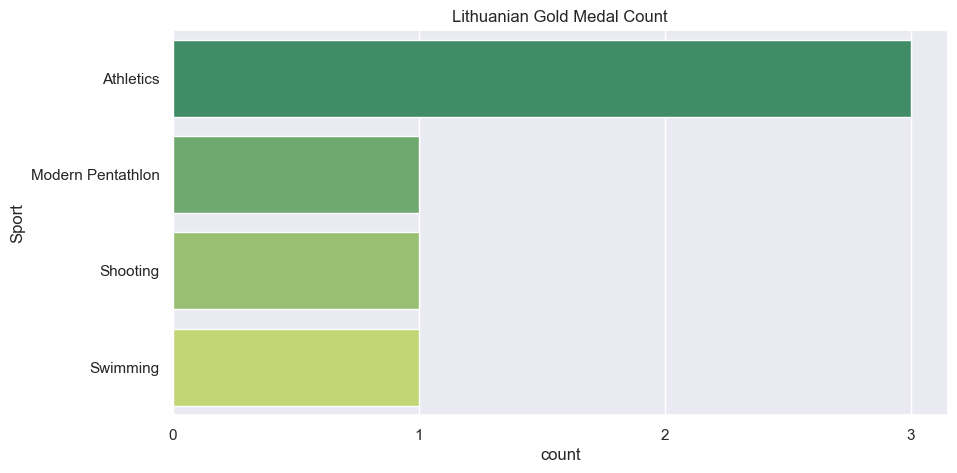

In [81]:
lithuanian_medals_gold_bar = BarPlot(data=lithuanian_gold_count, x='count', y='Sport')
lithuanian_medals_gold_bar.create_bar_plot(title="Lithuanian Gold Medal Count", palette='summer', figsize=(10,5))
lithuanian_medals_gold_bar.configure_xticks(min=0,max=3,step=1)

<Figure size 1000x500 with 0 Axes>

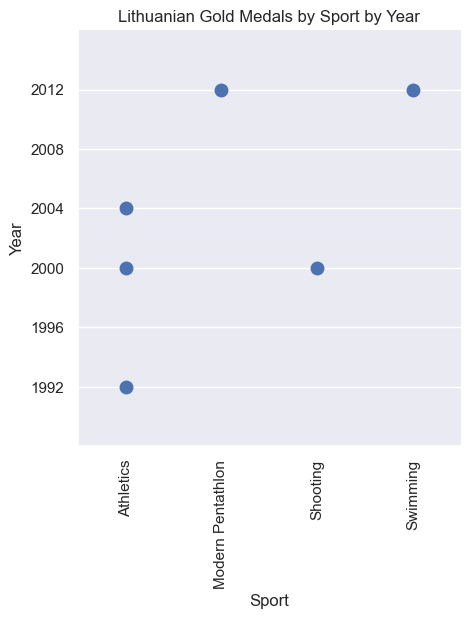

In [82]:
lithuanian_gold_catplot = Catplot(data = lithuanian_gold, x='Sport', y='Year', jitter=False, size=10)
lithuanian_gold_catplot.create_catplot(title='Lithuanian Gold Medals by Sport by Year')
lithuanian_gold_catplot.set_ylim_ticks(ylim_min=1988, ylim_max=2016, min=1992, max=2012, step=4, rotation=90)

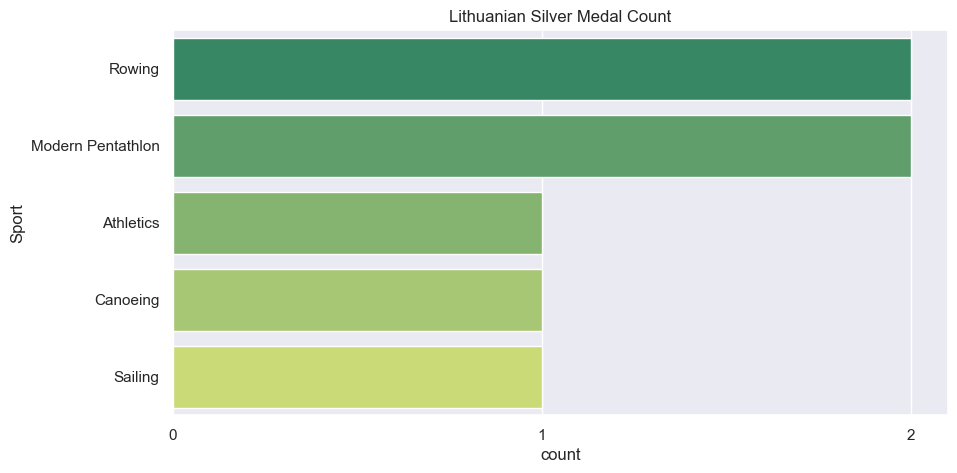

In [83]:
lithuanian_medals_silver_bar = BarPlot(data=lithuanian_silver_count, x='count', y='Sport')
lithuanian_medals_silver_bar.create_bar_plot(title="Lithuanian Silver Medal Count", palette='summer', figsize=(10,5))
lithuanian_medals_silver_bar.configure_xticks(min=0,max=2,step=1)

<Figure size 1000x500 with 0 Axes>

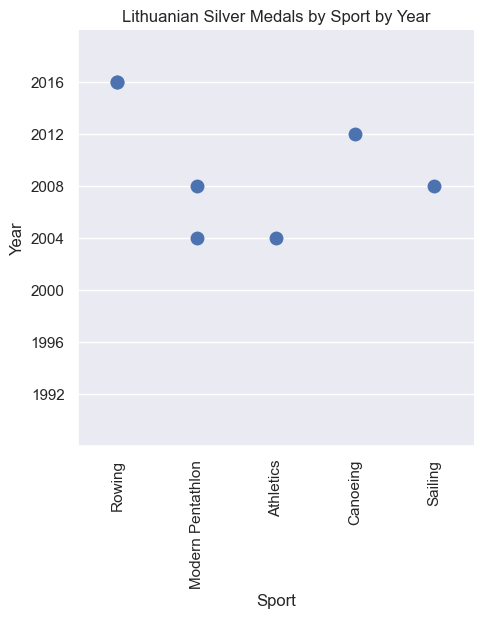

In [ ]:
lithuanian_silver_catplot = Catplot(data = lithuanian_silver, x='Sport', y='Year', jitter=False, size=10)
lithuanian_silver_catplot.create_catplot(title='Lithuanian Silver Medals by Sport by Year')
lithuanian_silver_catplot.set_ylim_ticks(ylim_min=1988, ylim_max=2020, min=1992, max=2016, step=4, rotation=90)

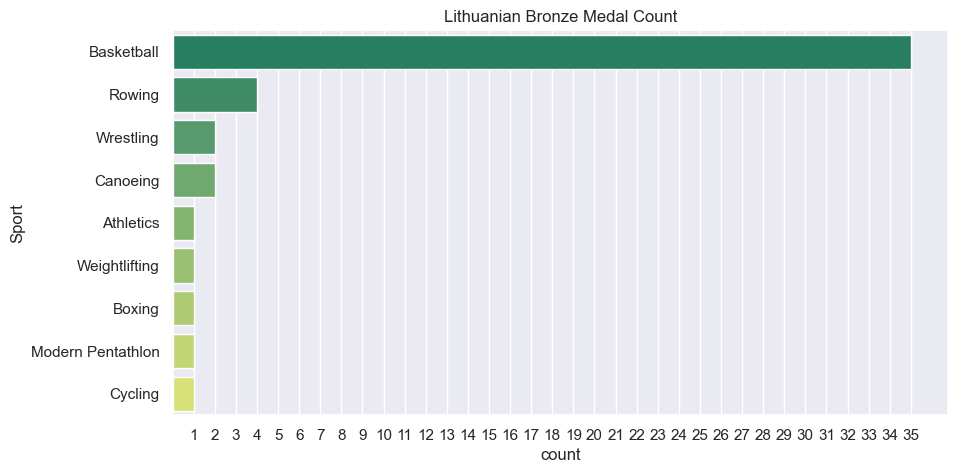

In [88]:
lithuanian_medals_bronze_bar = BarPlot(data=lithuanian_bronze_count, x='count', y='Sport')
lithuanian_medals_bronze_bar.create_bar_plot(title="Lithuanian Bronze Medal Count", palette='summer', figsize=(10,5))
lithuanian_medals_bronze_bar.configure_xticks(min=1,max=35,step=1)

<Figure size 1000x500 with 0 Axes>

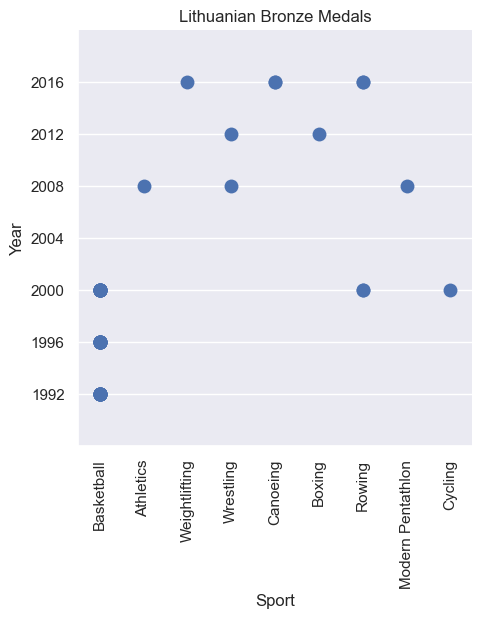

In [89]:
lithuanian_bronze_catplot = Catplot(data = lithuanian_bronze, x='Sport', y='Year', jitter=False, size=10)
lithuanian_bronze_catplot.create_catplot(title='Lithuanian Bronze Medals')
lithuanian_bronze_catplot.set_ylim_ticks(ylim_min=1988, ylim_max=2020, min=1992, max=2016, step=4, rotation=90)

In [90]:
lithuanian_medals_athletes = lithuanian_medals['Name'].value_counts().to_frame().reset_index()
lithuanian_medals_athletes_2 = lithuanian_medals_athletes[(lithuanian_medals_athletes['count']>=2)]
lithuanian_medals_athletes_2.index +=1
lithuanian_medals_athletes_2

,Name,count
1,Virgilijus Alekna,3
2,Gintaras Einikis,3
3,Artras Karniovas,2
4,Saulius tombergas,2
5,Eurelijus ukauskas,2
6,Andrejus Zadneprovskis,2
7,Arvydas Romas Sabonis,2
8,Raimondas arnas Mariulionis,2
9,Rimas Kurtinaitis,2


In [91]:
lithuanian_medals

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
1000,Dainius Adomaitis,M,26.0,202.0,100.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze,Lithuania,NaN
2469,Virgilijus Alekna,M,28.0,200.0,130.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Discus Throw,Gold,Lithuania,NaN
2469,Virgilijus Alekna,M,32.0,200.0,130.0,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Discus Throw,Gold,Lithuania,NaN
2469,Virgilijus Alekna,M,36.0,200.0,130.0,Lithuania,LTU,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Discus Throw,Bronze,Lithuania,NaN
5453,Laura Asadauskait-Zadneprovskien,F,28.0,160.0,49.0,Lithuania,LTU,2012 Summer,2012,Summer,London,Modern Pentathlon,Modern Pentathlon Women's Individual,Gold,Lithuania,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133642,Andrejus Zadneprovskis,M,33.0,176.0,74.0,Lithuania,LTU,2008 Summer,2008,Summer,Beijing,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze,Lithuania,NaN
134996,Diana ilit,F,24.0,162.0,61.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Cycling,"Cycling Women's Road Race, Individual",Bronze,Lithuania,NaN
135401,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze,Lithuania,NaN


In [92]:
lithuanian_gold_all = lithuanian_gold[['Name', 'Sport', 'Medal']].reset_index(drop=True)
lithuanian_gold_all_count = lithuanian_gold_all['Name'].value_counts().to_frame().reset_index()


In [93]:
lithuanian_medal_counts = lithuanian_medals.groupby(['Name', 'Sport', 'Medal']).size().reset_index(name='MedalCount')
pivot_table = lithuanian_medal_counts.pivot_table(index=['Name', 'Sport'], columns='Medal', values='MedalCount', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

lithuanians_with_at_least_2_medals = pivot_table[pivot_table['Total'] >= 2]
lithuanians_with_at_least_2_medals = lithuanians_with_at_least_2_medals.sort_values(['Gold'], ascending=False)
lithuanians_with_at_least_2_medals = lithuanians_with_at_least_2_medals.reset_index().rename_axis(columns=None)
lithuanians_with_at_least_2_medals.index +=1
lithuanians_with_at_least_2_medals

,Name,Sport,Bronze,Gold,Silver,Total
1,Virgilijus Alekna,Athletics,1,2,0,3
2,Andrejus Zadneprovskis,Modern Pentathlon,1,0,1,2
3,Artras Karniovas,Basketball,2,0,0,2
4,Arvydas Romas Sabonis,Basketball,2,0,0,2
5,Eurelijus ukauskas,Basketball,2,0,0,2
6,Gintaras Einikis,Basketball,3,0,0,3
7,Raimondas arnas Mariulionis,Basketball,2,0,0,2
8,Rimas Kurtinaitis,Basketball,2,0,0,2
9,Saulius tombergas,Basketball,2,0,0,2


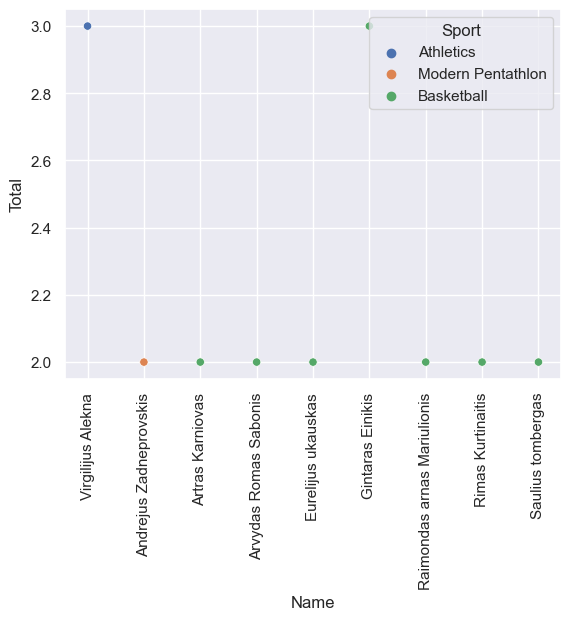

In [94]:
sns.scatterplot(data=lithuanians_with_at_least_2_medals,x='Name', y='Total', hue='Sport')
plt.xticks(rotation=90)
plt.show()

In [95]:
all_medal_counts = main.groupby(['Name','Sport','Medal','Team']).size().reset_index(name='MedalCount')
pivot_table_all = all_medal_counts.pivot_table(index=['Name','Sport','Team'], columns='Medal', values='MedalCount', fill_value=0)
pivot_table_all['Total'] = pivot_table_all.sum(axis=1)
pivot_table_all = pivot_table_all.sort_values(['Gold'], ascending=False)
pivot_table_all = pivot_table_all[pivot_table_all['Total'] >= 10]
pivot_table_all = pivot_table_all.reset_index().rename_axis(columns=None)
pivot_table_all.index +=1

pivot_table_all

,Name,Sport,Team,Bronze,Gold,Silver,Total
1,"Michael Fred Phelps, II",Swimming,United States,2,23,3,28
2,"Raymond Clarence ""Ray"" Ewry",Athletics,United States,0,10,0,10
3,Paavo Johannes Nurmi,Athletics,Finland,0,9,3,12
4,"Frederick Carlton ""Carl"" Lewis",Athletics,United States,0,9,1,10
5,Mark Andrew Spitz,Swimming,United States,1,9,1,11
6,Larysa Semenivna Latynina (Diriy-),Gymnastics,Soviet Union,4,9,5,18
7,"Matthew Nicholas ""Matt"" Biondi",Swimming,United States,1,8,2,11
8,Ole Einar Bjrndalen,Biathlon,Norway,1,8,4,13
9,Sawao Kato,Gymnastics,Japan,1,8,3,12
10,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,United States,1,8,3,12


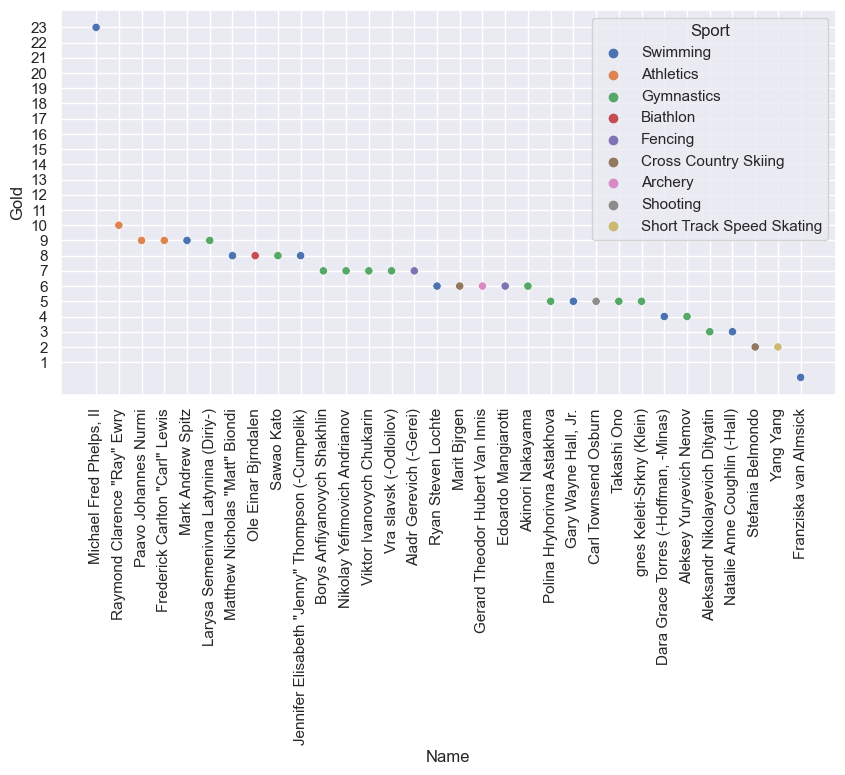

In [96]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pivot_table_all,x='Name', y='Gold', hue='Sport')
plt.xticks(rotation=90)
plt.yticks(range(1, 23 + 1, 1))
plt.show()


In [97]:
pivot_table_all['Team'] = pivot_table_all['Team'].replace('Soviet Union', 'Russia')

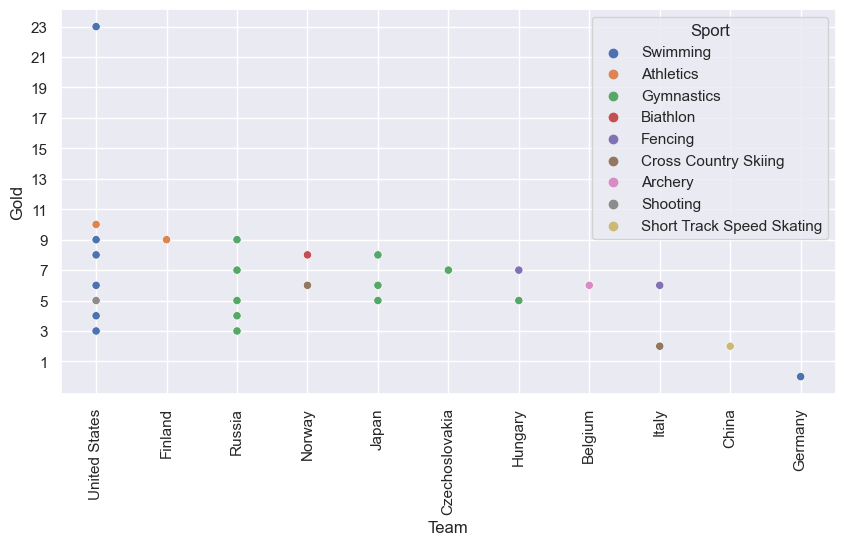

In [98]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pivot_table_all,x='Team', y='Gold', hue='Sport')
plt.xticks(rotation=90)
plt.yticks(range(1, 23 + 2, 2))
plt.show()